In [43]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import os
import re

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from pyecharts import *

##  1、读取文件
    要么是多个文件需要合并
    要么是一个已有的完整文件

### 1、多个文件合并
    我们的文件在 douban 目录下，分为list页 和 详情 detail 页

In [44]:
os.listdir('douban')

['doubanDetail0-10页.csv',
 'doubanDetail10-30页.csv',
 'doubanDetail100-140页.csv',
 'doubanDetail140-180页.csv',
 'doubanDetail180-200页.csv',
 'doubanDetail200-231页.csv',
 'doubanDetail230-250页.csv',
 'doubanDetail30-50页.csv',
 'doubanDetail50-70页.csv',
 'doubanDetail70-101页.csv',
 'DoubanTop250ListPage.csv']

####  读取list页

In [45]:
listpage = pd.read_csv('douban/DoubanTop250ListPage.csv' ,encoding='gbk',names=['rank','filmname','href'])
listpage

,rank,filmname,href
0,1,肖申克的救赎,https://movie.douban.com/subject/1292052/
1,2,霸王别姬,https://movie.douban.com/subject/1291546/
2,3,阿甘正传,https://movie.douban.com/subject/1292720/
3,4,这个杀手不太冷,https://movie.douban.com/subject/1295644/
4,5,泰坦尼克号,https://movie.douban.com/subject/1292722/
...,...,...,...
245,246,黑客帝国2：重装上阵,https://movie.douban.com/subject/1304141/
246,247,网络谜踪,https://movie.douban.com/subject/27615441/
247,248,四个春天,https://movie.douban.com/subject/27191492/
248,249,发条橙,https://movie.douban.com/subject/1292233/


####  重点在于 详情页的 n 个文件

In [46]:
# 取出详情页的文件名称
detail_file_list = os.listdir('douban')[:-1]
detail_file_list

['doubanDetail0-10页.csv',
 'doubanDetail10-30页.csv',
 'doubanDetail100-140页.csv',
 'doubanDetail140-180页.csv',
 'doubanDetail180-200页.csv',
 'doubanDetail200-231页.csv',
 'doubanDetail230-250页.csv',
 'doubanDetail30-50页.csv',
 'doubanDetail50-70页.csv',
 'doubanDetail70-101页.csv']

- 完成文件夹名称的排序

In [47]:
# 需要解决 取出 文件夹的名称中的 数字
# 如 'doubanDetail10-30页.csv'  的 10
example_str = 'doubanDetail10-30页.csv'
example_str

'doubanDetail10-30页.csv'

In [48]:
# 1 .索引
start = example_str.find('Detail')+len('Detail')
end = example_str.find('-')
start,end

(12, 14)

In [49]:
example_str[start:end]

'10'

In [50]:
# 排序
sorted(detail_file_list, key=lambda x: int(x[x.find('Detail')+len('Detail') : x.find('-') ])  )

['doubanDetail0-10页.csv',
 'doubanDetail10-30页.csv',
 'doubanDetail30-50页.csv',
 'doubanDetail50-70页.csv',
 'doubanDetail70-101页.csv',
 'doubanDetail100-140页.csv',
 'doubanDetail140-180页.csv',
 'doubanDetail180-200页.csv',
 'doubanDetail200-231页.csv',
 'doubanDetail230-250页.csv']

In [51]:
# 2 、分割
example_str.split('Detail')[1]

'10-30页.csv'

In [52]:
int( example_str.split('Detail')[1].split('-')[0] )

10

In [53]:
sorted(detail_file_list, key=lambda example_str: int( example_str.split('Detail')[1].split('-')[0] )  )

['doubanDetail0-10页.csv',
 'doubanDetail10-30页.csv',
 'doubanDetail30-50页.csv',
 'doubanDetail50-70页.csv',
 'doubanDetail70-101页.csv',
 'doubanDetail100-140页.csv',
 'doubanDetail140-180页.csv',
 'doubanDetail180-200页.csv',
 'doubanDetail200-231页.csv',
 'doubanDetail230-250页.csv']

In [54]:
# 3、 正则取数字
import re

In [55]:
pat = re.compile('\d+')

In [56]:
re.findall(pat , example_str)

['10', '30']

In [57]:
int(re.findall(pat , example_str)[0])

10

In [58]:
sorted_detail_list = sorted(detail_file_list, key=lambda example_str: int(re.findall(pat , example_str)[0])  )
sorted_detail_list

['doubanDetail0-10页.csv',
 'doubanDetail10-30页.csv',
 'doubanDetail30-50页.csv',
 'doubanDetail50-70页.csv',
 'doubanDetail70-101页.csv',
 'doubanDetail100-140页.csv',
 'doubanDetail140-180页.csv',
 'doubanDetail180-200页.csv',
 'doubanDetail200-231页.csv',
 'doubanDetail230-250页.csv']

- 读取还有一种方法，使用 glob 模块   
    glob.glob(  os.path.join( '路径文件夹', '文件的名称格式' )  )   
           * 表示n个字符

In [59]:
import glob

In [60]:
listdir = glob.glob(  os.path.join('douban', 'doubanDetail*页.csv') )
listdir

['douban\\doubanDetail0-10页.csv',
 'douban\\doubanDetail10-30页.csv',
 'douban\\doubanDetail100-140页.csv',
 'douban\\doubanDetail140-180页.csv',
 'douban\\doubanDetail180-200页.csv',
 'douban\\doubanDetail200-231页.csv',
 'douban\\doubanDetail230-250页.csv',
 'douban\\doubanDetail30-50页.csv',
 'douban\\doubanDetail50-70页.csv',
 'douban\\doubanDetail70-101页.csv']

In [61]:
listdir.sort(key=lambda x:int(x[x.find('Detail')+len('Detail') : x.find('-') ]))

In [62]:
listdir

['douban\\doubanDetail0-10页.csv',
 'douban\\doubanDetail10-30页.csv',
 'douban\\doubanDetail30-50页.csv',
 'douban\\doubanDetail50-70页.csv',
 'douban\\doubanDetail70-101页.csv',
 'douban\\doubanDetail100-140页.csv',
 'douban\\doubanDetail140-180页.csv',
 'douban\\doubanDetail180-200页.csv',
 'douban\\doubanDetail200-231页.csv',
 'douban\\doubanDetail230-250页.csv']

###  读取并合并数据
    pd.merge() 叠加效果
    pd.concat() 连接n个数据

In [63]:
detail = pd.concat( [pd.read_csv(each , header=None) for each in listdir] , ignore_index=True )
# 赋值 列名称
detail.columns = 'director/writer/actors/movie_type/area/language/year/movie_duration/score/numRaters/tags'.split('/')

In [64]:
detail

,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
0,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...,"['剧情', '犯罪']",美国,英语,1994-09-10(多伦多电影节),142分钟,9.7,2123239,"['经典', '励志', '信念', '自由', '人性', '人生', '美国', '希望']"
1,陈凯歌,芦苇 / 李碧华,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...,"['剧情', '爱情', '同性']",中国大陆 / 中国香港,汉语普通话,1993-01-01(中国香港),171分钟,9.6,1573440,"['经典', '人性', '文艺', '爱情', '人生', '文革', '剧情', '同志']"
2,罗伯特·泽米吉斯,艾瑞克·罗斯 / 温斯顿·格鲁姆,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...,"['剧情', '爱情']",美国,英语,1994-06-23(洛杉矶首映),142分钟,9.5,1603749,"['励志', '经典', '人生', '成长', '美国', '信念', '剧情', '人性']"
3,吕克·贝松,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...,"['剧情', '动作', '犯罪']",法国 / 美国,英语 / 意大利语 / 法语,1994-09-14(法国),110分钟(剧场版),9.4,1790692,"['经典', '温情', '爱情', '人性', '成长', '剧情', '犯罪', '动作']"
4,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,"['剧情', '爱情', '灾难']",美国,英语 / 意大利语 / 德语 / 俄语,1998-04-03(中国大陆),194分钟,9.4,1556469,"['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']"
...,...,...,...,...,...,...,...,...,...,...,...
252,莉莉·沃卓斯基 / 拉娜·沃卓斯基,莉莉·沃卓斯基 / 拉娜·沃卓斯基,基努·里维斯 / 劳伦斯·菲什伯恩 / 凯瑞-安·莫斯 / 雨果·维文 / 莫妮卡·贝鲁奇 ...,"['动作', '科幻']",美国 / 澳大利亚,英语 / 法语,2003-07-18(中国大陆),138分钟,8.6,269358,"['科幻', '美国', '动作', '黑客帝国', '经典', '哲学', '美国电影',..."
253,阿尼什·查甘蒂,阿尼什·查甘蒂 / 赛弗·奥哈尼安,约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...,"['剧情', '悬疑', '惊悚', '犯罪']",美国 / 俄罗斯,英语,2018-12-14(中国大陆),102分钟,8.6,394569,"['悬疑', '犯罪', '美国', '推理', '剧情', '网络', '家庭', '20..."
254,陆庆屹,陆运坤 / 李桂贤 / 陆庆伟 / 陆庆松 / 陆庆屹,NaN,"['纪录片', '家庭']",中国大陆,贵州独山话,2019-01-04(中国大陆),105分钟,8.9,123204,"['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ..."
255,斯坦利·库布里克,斯坦利·库布里克 / 安东尼·伯吉斯,马尔科姆·麦克道威尔 / 帕特里克·马基 / 迈克尔·贝茨 / 沃伦·克拉克 / 约翰·克莱夫,"['剧情', '科幻', '犯罪']",英国 / 美国,英语,1971-12-19(纽约首映),136 分钟,8.6,288083,"['暴力', '库布里克', '发条橙', '英国', '经典', '青春', '犯罪', ..."


In [65]:
detail.info()
# 我们发现 实际有 257个数据，应该有250个，说明有重复的 ，需要去重

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   director        257 non-null    object 
 1   writer          256 non-null    object 
 2   actors          254 non-null    object 
 3   movie_type      257 non-null    object 
 4   area            257 non-null    object 
 5   language        257 non-null    object 
 6   year            257 non-null    object 
 7   movie_duration  257 non-null    object 
 8   score           257 non-null    float64
 9   numRaters       257 non-null    int64  
 10  tags            257 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 22.2+ KB


In [66]:
# 我们发现 ，直接 整体去重 ，还有 252 个，说明去重不完全
detail.drop_duplicates()

,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
0,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...,"['剧情', '犯罪']",美国,英语,1994-09-10(多伦多电影节),142分钟,9.7,2123239,"['经典', '励志', '信念', '自由', '人性', '人生', '美国', '希望']"
1,陈凯歌,芦苇 / 李碧华,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...,"['剧情', '爱情', '同性']",中国大陆 / 中国香港,汉语普通话,1993-01-01(中国香港),171分钟,9.6,1573440,"['经典', '人性', '文艺', '爱情', '人生', '文革', '剧情', '同志']"
2,罗伯特·泽米吉斯,艾瑞克·罗斯 / 温斯顿·格鲁姆,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...,"['剧情', '爱情']",美国,英语,1994-06-23(洛杉矶首映),142分钟,9.5,1603749,"['励志', '经典', '人生', '成长', '美国', '信念', '剧情', '人性']"
3,吕克·贝松,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...,"['剧情', '动作', '犯罪']",法国 / 美国,英语 / 意大利语 / 法语,1994-09-14(法国),110分钟(剧场版),9.4,1790692,"['经典', '温情', '爱情', '人性', '成长', '剧情', '犯罪', '动作']"
4,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,"['剧情', '爱情', '灾难']",美国,英语 / 意大利语 / 德语 / 俄语,1998-04-03(中国大陆),194分钟,9.4,1556469,"['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']"
...,...,...,...,...,...,...,...,...,...,...,...
252,莉莉·沃卓斯基 / 拉娜·沃卓斯基,莉莉·沃卓斯基 / 拉娜·沃卓斯基,基努·里维斯 / 劳伦斯·菲什伯恩 / 凯瑞-安·莫斯 / 雨果·维文 / 莫妮卡·贝鲁奇 ...,"['动作', '科幻']",美国 / 澳大利亚,英语 / 法语,2003-07-18(中国大陆),138分钟,8.6,269358,"['科幻', '美国', '动作', '黑客帝国', '经典', '哲学', '美国电影',..."
253,阿尼什·查甘蒂,阿尼什·查甘蒂 / 赛弗·奥哈尼安,约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...,"['剧情', '悬疑', '惊悚', '犯罪']",美国 / 俄罗斯,英语,2018-12-14(中国大陆),102分钟,8.6,394569,"['悬疑', '犯罪', '美国', '推理', '剧情', '网络', '家庭', '20..."
254,陆庆屹,陆运坤 / 李桂贤 / 陆庆伟 / 陆庆松 / 陆庆屹,NaN,"['纪录片', '家庭']",中国大陆,贵州独山话,2019-01-04(中国大陆),105分钟,8.9,123204,"['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ..."
255,斯坦利·库布里克,斯坦利·库布里克 / 安东尼·伯吉斯,马尔科姆·麦克道威尔 / 帕特里克·马基 / 迈克尔·贝茨 / 沃伦·克拉克 / 约翰·克莱夫,"['剧情', '科幻', '犯罪']",英国 / 美国,英语,1971-12-19(纽约首映),136 分钟,8.6,288083,"['暴力', '库布里克', '发条橙', '英国', '经典', '青春', '犯罪', ..."


In [67]:
# 原因 ： 可能是评分 ，评论人数，或者 标签 随时间改变了，去重就不考虑这三列
detail = detail.drop_duplicates(subset=detail.columns[:-3])
detail

,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
0,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...,"['剧情', '犯罪']",美国,英语,1994-09-10(多伦多电影节),142分钟,9.7,2123239,"['经典', '励志', '信念', '自由', '人性', '人生', '美国', '希望']"
1,陈凯歌,芦苇 / 李碧华,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...,"['剧情', '爱情', '同性']",中国大陆 / 中国香港,汉语普通话,1993-01-01(中国香港),171分钟,9.6,1573440,"['经典', '人性', '文艺', '爱情', '人生', '文革', '剧情', '同志']"
2,罗伯特·泽米吉斯,艾瑞克·罗斯 / 温斯顿·格鲁姆,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...,"['剧情', '爱情']",美国,英语,1994-06-23(洛杉矶首映),142分钟,9.5,1603749,"['励志', '经典', '人生', '成长', '美国', '信念', '剧情', '人性']"
3,吕克·贝松,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...,"['剧情', '动作', '犯罪']",法国 / 美国,英语 / 意大利语 / 法语,1994-09-14(法国),110分钟(剧场版),9.4,1790692,"['经典', '温情', '爱情', '人性', '成长', '剧情', '犯罪', '动作']"
4,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,"['剧情', '爱情', '灾难']",美国,英语 / 意大利语 / 德语 / 俄语,1998-04-03(中国大陆),194分钟,9.4,1556469,"['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']"
...,...,...,...,...,...,...,...,...,...,...,...
252,莉莉·沃卓斯基 / 拉娜·沃卓斯基,莉莉·沃卓斯基 / 拉娜·沃卓斯基,基努·里维斯 / 劳伦斯·菲什伯恩 / 凯瑞-安·莫斯 / 雨果·维文 / 莫妮卡·贝鲁奇 ...,"['动作', '科幻']",美国 / 澳大利亚,英语 / 法语,2003-07-18(中国大陆),138分钟,8.6,269358,"['科幻', '美国', '动作', '黑客帝国', '经典', '哲学', '美国电影',..."
253,阿尼什·查甘蒂,阿尼什·查甘蒂 / 赛弗·奥哈尼安,约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...,"['剧情', '悬疑', '惊悚', '犯罪']",美国 / 俄罗斯,英语,2018-12-14(中国大陆),102分钟,8.6,394569,"['悬疑', '犯罪', '美国', '推理', '剧情', '网络', '家庭', '20..."
254,陆庆屹,陆运坤 / 李桂贤 / 陆庆伟 / 陆庆松 / 陆庆屹,NaN,"['纪录片', '家庭']",中国大陆,贵州独山话,2019-01-04(中国大陆),105分钟,8.9,123204,"['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ..."
255,斯坦利·库布里克,斯坦利·库布里克 / 安东尼·伯吉斯,马尔科姆·麦克道威尔 / 帕特里克·马基 / 迈克尔·贝茨 / 沃伦·克拉克 / 约翰·克莱夫,"['剧情', '科幻', '犯罪']",英国 / 美国,英语,1971-12-19(纽约首映),136 分钟,8.6,288083,"['暴力', '库布里克', '发条橙', '英国', '经典', '青春', '犯罪', ..."


####  合并 列表页 与 详情页 

In [68]:
# 没有相同的列，赋予 detail 一个 rank 
detail.insert(0,'rank',range(1,251))
detail

,rank,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
0,1,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...,"['剧情', '犯罪']",美国,英语,1994-09-10(多伦多电影节),142分钟,9.7,2123239,"['经典', '励志', '信念', '自由', '人性', '人生', '美国', '希望']"
1,2,陈凯歌,芦苇 / 李碧华,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...,"['剧情', '爱情', '同性']",中国大陆 / 中国香港,汉语普通话,1993-01-01(中国香港),171分钟,9.6,1573440,"['经典', '人性', '文艺', '爱情', '人生', '文革', '剧情', '同志']"
2,3,罗伯特·泽米吉斯,艾瑞克·罗斯 / 温斯顿·格鲁姆,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...,"['剧情', '爱情']",美国,英语,1994-06-23(洛杉矶首映),142分钟,9.5,1603749,"['励志', '经典', '人生', '成长', '美国', '信念', '剧情', '人性']"
3,4,吕克·贝松,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...,"['剧情', '动作', '犯罪']",法国 / 美国,英语 / 意大利语 / 法语,1994-09-14(法国),110分钟(剧场版),9.4,1790692,"['经典', '温情', '爱情', '人性', '成长', '剧情', '犯罪', '动作']"
4,5,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,"['剧情', '爱情', '灾难']",美国,英语 / 意大利语 / 德语 / 俄语,1998-04-03(中国大陆),194分钟,9.4,1556469,"['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']"
...,...,...,...,...,...,...,...,...,...,...,...,...
252,246,莉莉·沃卓斯基 / 拉娜·沃卓斯基,莉莉·沃卓斯基 / 拉娜·沃卓斯基,基努·里维斯 / 劳伦斯·菲什伯恩 / 凯瑞-安·莫斯 / 雨果·维文 / 莫妮卡·贝鲁奇 ...,"['动作', '科幻']",美国 / 澳大利亚,英语 / 法语,2003-07-18(中国大陆),138分钟,8.6,269358,"['科幻', '美国', '动作', '黑客帝国', '经典', '哲学', '美国电影',..."
253,247,阿尼什·查甘蒂,阿尼什·查甘蒂 / 赛弗·奥哈尼安,约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...,"['剧情', '悬疑', '惊悚', '犯罪']",美国 / 俄罗斯,英语,2018-12-14(中国大陆),102分钟,8.6,394569,"['悬疑', '犯罪', '美国', '推理', '剧情', '网络', '家庭', '20..."
254,248,陆庆屹,陆运坤 / 李桂贤 / 陆庆伟 / 陆庆松 / 陆庆屹,NaN,"['纪录片', '家庭']",中国大陆,贵州独山话,2019-01-04(中国大陆),105分钟,8.9,123204,"['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ..."
255,249,斯坦利·库布里克,斯坦利·库布里克 / 安东尼·伯吉斯,马尔科姆·麦克道威尔 / 帕特里克·马基 / 迈克尔·贝茨 / 沃伦·克拉克 / 约翰·克莱夫,"['剧情', '科幻', '犯罪']",英国 / 美国,英语,1971-12-19(纽约首映),136 分钟,8.6,288083,"['暴力', '库布里克', '发条橙', '英国', '经典', '青春', '犯罪', ..."


In [69]:
lastdata = pd.merge( listpage[['rank','filmname']],detail )
lastdata

,rank,filmname,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
0,1,肖申克的救赎,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...,"['剧情', '犯罪']",美国,英语,1994-09-10(多伦多电影节),142分钟,9.7,2123239,"['经典', '励志', '信念', '自由', '人性', '人生', '美国', '希望']"
1,2,霸王别姬,陈凯歌,芦苇 / 李碧华,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...,"['剧情', '爱情', '同性']",中国大陆 / 中国香港,汉语普通话,1993-01-01(中国香港),171分钟,9.6,1573440,"['经典', '人性', '文艺', '爱情', '人生', '文革', '剧情', '同志']"
2,3,阿甘正传,罗伯特·泽米吉斯,艾瑞克·罗斯 / 温斯顿·格鲁姆,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...,"['剧情', '爱情']",美国,英语,1994-06-23(洛杉矶首映),142分钟,9.5,1603749,"['励志', '经典', '人生', '成长', '美国', '信念', '剧情', '人性']"
3,4,这个杀手不太冷,吕克·贝松,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...,"['剧情', '动作', '犯罪']",法国 / 美国,英语 / 意大利语 / 法语,1994-09-14(法国),110分钟(剧场版),9.4,1790692,"['经典', '温情', '爱情', '人性', '成长', '剧情', '犯罪', '动作']"
4,5,泰坦尼克号,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,"['剧情', '爱情', '灾难']",美国,英语 / 意大利语 / 德语 / 俄语,1998-04-03(中国大陆),194分钟,9.4,1556469,"['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,黑客帝国2：重装上阵,莉莉·沃卓斯基 / 拉娜·沃卓斯基,莉莉·沃卓斯基 / 拉娜·沃卓斯基,基努·里维斯 / 劳伦斯·菲什伯恩 / 凯瑞-安·莫斯 / 雨果·维文 / 莫妮卡·贝鲁奇 ...,"['动作', '科幻']",美国 / 澳大利亚,英语 / 法语,2003-07-18(中国大陆),138分钟,8.6,269358,"['科幻', '美国', '动作', '黑客帝国', '经典', '哲学', '美国电影',..."
246,247,网络谜踪,阿尼什·查甘蒂,阿尼什·查甘蒂 / 赛弗·奥哈尼安,约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...,"['剧情', '悬疑', '惊悚', '犯罪']",美国 / 俄罗斯,英语,2018-12-14(中国大陆),102分钟,8.6,394569,"['悬疑', '犯罪', '美国', '推理', '剧情', '网络', '家庭', '20..."
247,248,四个春天,陆庆屹,陆运坤 / 李桂贤 / 陆庆伟 / 陆庆松 / 陆庆屹,NaN,"['纪录片', '家庭']",中国大陆,贵州独山话,2019-01-04(中国大陆),105分钟,8.9,123204,"['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ..."
248,249,发条橙,斯坦利·库布里克,斯坦利·库布里克 / 安东尼·伯吉斯,马尔科姆·麦克道威尔 / 帕特里克·马基 / 迈克尔·贝茨 / 沃伦·克拉克 / 约翰·克莱夫,"['剧情', '科幻', '犯罪']",英国 / 美国,英语,1971-12-19(纽约首映),136 分钟,8.6,288083,"['暴力', '库布里克', '发条橙', '英国', '经典', '青春', '犯罪', ..."


In [70]:
# 最好保存一下，下次再用，直接使用
lastdata.to_csv('alldata.csv')

##  2、分析环节

In [71]:
# 可以使用处理后的文件
data = pd.read_csv('alldata.csv', index_col=0)
data

,rank,filmname,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
0,1,肖申克的救赎,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...,"['剧情', '犯罪']",美国,英语,1994-09-10(多伦多电影节),142分钟,9.7,2123239,"['经典', '励志', '信念', '自由', '人性', '人生', '美国', '希望']"
1,2,霸王别姬,陈凯歌,芦苇 / 李碧华,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...,"['剧情', '爱情', '同性']",中国大陆 / 中国香港,汉语普通话,1993-01-01(中国香港),171分钟,9.6,1573440,"['经典', '人性', '文艺', '爱情', '人生', '文革', '剧情', '同志']"
2,3,阿甘正传,罗伯特·泽米吉斯,艾瑞克·罗斯 / 温斯顿·格鲁姆,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...,"['剧情', '爱情']",美国,英语,1994-06-23(洛杉矶首映),142分钟,9.5,1603749,"['励志', '经典', '人生', '成长', '美国', '信念', '剧情', '人性']"
3,4,这个杀手不太冷,吕克·贝松,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...,"['剧情', '动作', '犯罪']",法国 / 美国,英语 / 意大利语 / 法语,1994-09-14(法国),110分钟(剧场版),9.4,1790692,"['经典', '温情', '爱情', '人性', '成长', '剧情', '犯罪', '动作']"
4,5,泰坦尼克号,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,"['剧情', '爱情', '灾难']",美国,英语 / 意大利语 / 德语 / 俄语,1998-04-03(中国大陆),194分钟,9.4,1556469,"['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,黑客帝国2：重装上阵,莉莉·沃卓斯基 / 拉娜·沃卓斯基,莉莉·沃卓斯基 / 拉娜·沃卓斯基,基努·里维斯 / 劳伦斯·菲什伯恩 / 凯瑞-安·莫斯 / 雨果·维文 / 莫妮卡·贝鲁奇 ...,"['动作', '科幻']",美国 / 澳大利亚,英语 / 法语,2003-07-18(中国大陆),138分钟,8.6,269358,"['科幻', '美国', '动作', '黑客帝国', '经典', '哲学', '美国电影',..."
246,247,网络谜踪,阿尼什·查甘蒂,阿尼什·查甘蒂 / 赛弗·奥哈尼安,约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...,"['剧情', '悬疑', '惊悚', '犯罪']",美国 / 俄罗斯,英语,2018-12-14(中国大陆),102分钟,8.6,394569,"['悬疑', '犯罪', '美国', '推理', '剧情', '网络', '家庭', '20..."
247,248,四个春天,陆庆屹,陆运坤 / 李桂贤 / 陆庆伟 / 陆庆松 / 陆庆屹,NaN,"['纪录片', '家庭']",中国大陆,贵州独山话,2019-01-04(中国大陆),105分钟,8.9,123204,"['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ..."
248,249,发条橙,斯坦利·库布里克,斯坦利·库布里克 / 安东尼·伯吉斯,马尔科姆·麦克道威尔 / 帕特里克·马基 / 迈克尔·贝茨 / 沃伦·克拉克 / 约翰·克莱夫,"['剧情', '科幻', '犯罪']",英国 / 美国,英语,1971-12-19(纽约首映),136 分钟,8.6,288083,"['暴力', '库布里克', '发条橙', '英国', '经典', '青春', '犯罪', ..."


In [72]:
data.info()
# 注意 wirter 和 actor 有空值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   filmname        250 non-null    object 
 2   director        250 non-null    object 
 3   writer          249 non-null    object 
 4   actors          247 non-null    object 
 5   movie_type      250 non-null    object 
 6   area            250 non-null    object 
 7   language        250 non-null    object 
 8   year            250 non-null    object 
 9   movie_duration  250 non-null    object 
 10  score           250 non-null    float64
 11  numRaters       250 non-null    int64  
 12  tags            250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 27.3+ KB


###  2.1、分析导演

In [73]:
data.director

0               弗兰克·德拉邦特
1                    陈凯歌
2               罗伯特·泽米吉斯
3                  吕克·贝松
4                詹姆斯·卡梅隆
             ...        
245    莉莉·沃卓斯基 / 拉娜·沃卓斯基
246              阿尼什·查甘蒂
247                  陆庆屹
248             斯坦利·库布里克
249            史蒂文·斯皮尔伯格
Name: director, Length: 250, dtype: object

In [74]:
# 统计数量
data.director.value_counts()

宫崎骏                  7
克里斯托弗·诺兰             7
史蒂文·斯皮尔伯格            7
李安                   5
王家卫                  5
                    ..
王晶                   1
丹尼·博伊尔 / 洛芙琳·坦丹      1
周星驰 / 李力持            1
弗洛里安·亨克尔·冯·多纳斯马尔克    1
阿斯哈·法哈蒂              1
Name: director, Length: 182, dtype: int64

In [75]:
# 注意： 防止 导演前后有空格，我们需要去除 两边的空格，再 统计
director_count = data.director.str.strip().value_counts()
director_count

宫崎骏                  7
克里斯托弗·诺兰             7
史蒂文·斯皮尔伯格            7
李安                   5
王家卫                  5
                    ..
王晶                   1
丹尼·博伊尔 / 洛芙琳·坦丹      1
周星驰 / 李力持            1
弗洛里安·亨克尔·冯·多纳斯马尔克    1
阿斯哈·法哈蒂              1
Name: director, Length: 182, dtype: int64

#### 做个统计结论：取前3名上榜导演

In [76]:
# 1、读取的方式
director_count.iloc[:3]

宫崎骏          7
克里斯托弗·诺兰     7
史蒂文·斯皮尔伯格    7
Name: director, dtype: int64

In [77]:
# 2.  xxx.head(n=5)   xxx.tail(n=5)
director_count.head(3)

宫崎骏          7
克里斯托弗·诺兰     7
史蒂文·斯皮尔伯格    7
Name: director, dtype: int64

- 是否要考虑：并列名次， 使用 排名函数 rank()

In [78]:
con = director_count.rank(method='dense' ,ascending=False)<=3
con

宫崎骏                   True
克里斯托弗·诺兰              True
史蒂文·斯皮尔伯格             True
李安                    True
王家卫                   True
                     ...  
王晶                   False
丹尼·博伊尔 / 洛芙琳·坦丹      False
周星驰 / 李力持            False
弗洛里安·亨克尔·冯·多纳斯马尔克    False
阿斯哈·法哈蒂              False
Name: director, Length: 182, dtype: bool

In [79]:
director_count[con]

宫崎骏          7
克里斯托弗·诺兰     7
史蒂文·斯皮尔伯格    7
李安           5
王家卫          5
大卫·芬奇        4
是枝裕和         4
Name: director, dtype: int64

<AxesSubplot:title={'center':'上榜导演Top3'}>

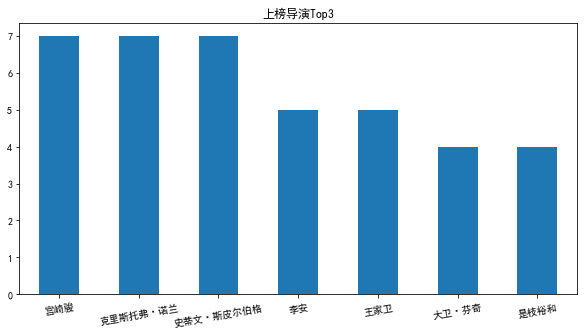

In [80]:
director_count[con].plot(kind='bar',figsize=(10,5),rot=10 ,title='上榜导演Top3')

In [81]:
bar = Bar('上榜导演Top3',title_pos='center')
bar.add('导演',director_count[con].index ,director_count[con].values,
       legend_pos='82%',is_label_show=True,
        xaxis_interval=0 ,
        xaxis_label_textsize=10,
        xaxis_rotate=10
       )

####  取出 克里斯托弗·诺兰 的电影
#### 取出Top3所有人的电影，统计电影类型

In [82]:
# 取  克里斯托弗·诺兰 的几种方式

In [83]:
data.director

0               弗兰克·德拉邦特
1                    陈凯歌
2               罗伯特·泽米吉斯
3                  吕克·贝松
4                詹姆斯·卡梅隆
             ...        
245    莉莉·沃卓斯基 / 拉娜·沃卓斯基
246              阿尼什·查甘蒂
247                  陆庆屹
248             斯坦利·库布里克
249            史蒂文·斯皮尔伯格
Name: director, Length: 250, dtype: object

In [84]:
# 方式1：
# con1 = data.director.apply(lambda x:'克里斯托弗·诺兰' in x)
con1 = data.director.str.contains('克里斯托弗·诺兰')

In [85]:
# 方式2：
con2 = data.director.str.strip() == '克里斯托弗·诺兰'

In [86]:
# 方式3：
con3 = data.director.str.strip().isin( ['克里斯托弗·诺兰'] )

In [87]:
data[con3]

,rank,filmname,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
8,9,盗梦空间,克里斯托弗·诺兰,克里斯托弗·诺兰,莱昂纳多·迪卡普里奥 / 约瑟夫·高登-莱维特 / 艾伦·佩吉 / 汤姆·哈迪 / 渡边谦 ...,"['剧情', '科幻', '悬疑', '冒险']",美国 / 英国,英语 / 日语 / 法语,2010-09-01(中国大陆),148分钟,9.3,1530074,"['科幻', '悬疑', '心理', '美国', '剧情', '经典', '梦', '哲学']"
12,13,星际穿越,克里斯托弗·诺兰,乔纳森·诺兰 / 克里斯托弗·诺兰,马修·麦康纳 / 安妮·海瑟薇 / 杰西卡·查斯坦 / 麦肯吉·弗依 / 卡西·阿弗莱克 /...,"['剧情', '科幻', '冒险']",美国 / 英国 / 加拿大 / 冰岛,英语,2014-11-12(中国大陆),169分钟,9.3,1216999,"['科幻', '太空', '宇宙', '美国', '人性', '亲情', '冒险', '震撼']"
26,27,蝙蝠侠：黑暗骑士,克里斯托弗·诺兰,乔纳森·诺兰 / 克里斯托弗·诺兰 / 大卫·S·高耶,克里斯蒂安·贝尔 / 希斯·莱杰 / 艾伦·艾克哈特 / 迈克尔·凯恩 / 玛吉·吉伦哈尔 ...,"['剧情', '动作', '科幻', '惊悚', '犯罪']",美国 / 英国,英语 / 汉语普通话,2008-07-14(纽约首映),152分钟,9.2,766142,"['诺兰', '美国', '科幻', '犯罪', '人性', '动作', '经典', '漫画..."
76,77,致命魔术,克里斯托弗·诺兰,乔纳森·诺兰 / 克里斯托弗·诺兰 / 克里斯托弗·普瑞丝特,休·杰克曼 / 克里斯蒂安·贝尔 / 迈克尔·凯恩 / 丽贝卡·豪尔 / 斯嘉丽·约翰逊 /...,"['剧情', '悬疑', '惊悚']",英国 / 美国,英语,2006-10-17(罗马电影节),130分钟,8.9,629255,"['悬疑', '魔术', '美国', '剧情', '科幻', 'ChristopherNol..."
114,115,蝙蝠侠：黑暗骑士崛起,克里斯托弗·诺兰,大卫·S·高耶 / 乔纳森·诺兰 / 克里斯托弗·诺兰,克里斯蒂安·贝尔 / 汤姆·哈迪 / 安妮·海瑟薇 / 约瑟夫·高登-莱维特 / 玛丽昂·歌...,"['剧情', '动作', '科幻', '惊悚', '犯罪']",美国 / 英国,英语 / 阿拉伯语,2012-08-27(中国大陆),165分钟,8.8,527992,"['蝙蝠侠', '美国', '科幻', '超级英雄', '动作', '犯罪', '漫画改编'..."
167,168,记忆碎片,克里斯托弗·诺兰,克里斯托弗·诺兰 / 乔纳森·诺兰,盖·皮尔斯 / 凯瑞-安·莫斯 / 乔·潘托里亚诺 / 小马克·布恩 / 拉什·费加 / 乔...,"['剧情', '悬疑', '惊悚', '犯罪']",美国,英语,2000-09-05(威尼斯电影节),113分钟,8.6,455741,"['悬疑', '美国', '剧情', '失忆', '惊悚', '心理', '记忆', '犯罪']"
240,241,追随,克里斯托弗·诺兰,克里斯托弗·诺兰,杰里米·西奥伯德 / 亚历克斯·霍 / 露西·拉塞尔 / 约翰·诺兰 / 迪克·布拉德塞尔 ...,"['悬疑', '惊悚', '犯罪']",英国,英语,1998-09-12(多伦多电影节),69分钟,8.9,136639,"['悬疑', '英国', '犯罪', '剧情', '黑白', '经典', '心理', '惊悚']"


- 匹配多个导演    
    目的：得到匹配的 bool序列

In [88]:
director_count[con]

宫崎骏          7
克里斯托弗·诺兰     7
史蒂文·斯皮尔伯格    7
李安           5
王家卫          5
大卫·芬奇        4
是枝裕和         4
Name: director, dtype: int64

In [89]:
director_count[con].index

Index(['宫崎骏', '克里斯托弗·诺兰', '史蒂文·斯皮尔伯格', '李安', '王家卫', '大卫·芬奇', '是枝裕和'], dtype='object')

In [90]:
# 方法1 ：apply 函数
more_con1 = data.director.apply(lambda x: x in director_count[con].index)

In [91]:
# 方法2 ： str.contains(  正则 )
'|'.join( list(director_count[con].index) )

'宫崎骏|克里斯托弗·诺兰|史蒂文·斯皮尔伯格|李安|王家卫|大卫·芬奇|是枝裕和'

In [92]:
more_con2 = data.director.str.contains( '|'.join( list(director_count[con].index) ) )

In [93]:
# 方法3： isin( [ 多个值] )
more_con3 = data.director.isin( director_count[con].index )

In [94]:
data[more_con3][['rank','filmname','director','movie_type']]

,rank,filmname,director,movie_type
6,7,千与千寻,宫崎骏,"['剧情', '动画', '奇幻']"
7,8,辛德勒的名单,史蒂文·斯皮尔伯格,"['剧情', '历史', '战争']"
8,9,盗梦空间,克里斯托弗·诺兰,"['剧情', '科幻', '悬疑', '冒险']"
12,13,星际穿越,克里斯托弗·诺兰,"['剧情', '科幻', '冒险']"
20,21,龙猫,宫崎骏,"['动画', '奇幻', '冒险']"
26,27,蝙蝠侠：黑暗骑士,克里斯托弗·诺兰,"['剧情', '动作', '科幻', '惊悚', '犯罪']"
35,36,少年派的奇幻漂流,李安,"['剧情', '奇幻', '冒险']"
39,40,哈尔的移动城堡,宫崎骏,"['动画', '奇幻', '冒险']"
40,41,天空之城,宫崎骏,"['动画', '奇幻', '冒险']"
48,49,搏击俱乐部,大卫·芬奇,"['剧情', '动作', '悬疑', '惊悚']"


- 分析Top3 的电影类型

In [95]:
top3 = data[more_con3][['rank','filmname','director','movie_type']]
top3

,rank,filmname,director,movie_type
6,7,千与千寻,宫崎骏,"['剧情', '动画', '奇幻']"
7,8,辛德勒的名单,史蒂文·斯皮尔伯格,"['剧情', '历史', '战争']"
8,9,盗梦空间,克里斯托弗·诺兰,"['剧情', '科幻', '悬疑', '冒险']"
12,13,星际穿越,克里斯托弗·诺兰,"['剧情', '科幻', '冒险']"
20,21,龙猫,宫崎骏,"['动画', '奇幻', '冒险']"
26,27,蝙蝠侠：黑暗骑士,克里斯托弗·诺兰,"['剧情', '动作', '科幻', '惊悚', '犯罪']"
35,36,少年派的奇幻漂流,李安,"['剧情', '奇幻', '冒险']"
39,40,哈尔的移动城堡,宫崎骏,"['动画', '奇幻', '冒险']"
40,41,天空之城,宫崎骏,"['动画', '奇幻', '冒险']"
48,49,搏击俱乐部,大卫·芬奇,"['剧情', '动作', '悬疑', '惊悚']"


In [96]:
# 取出电影类型，进行处理，把每行的字符串内容取出，变成list
# 统计出现次数 语法   pd.value_counts( )
top3.movie_type

6                  ['剧情', '动画', '奇幻']
7                  ['剧情', '历史', '战争']
8            ['剧情', '科幻', '悬疑', '冒险']
12                 ['剧情', '科幻', '冒险']
20                 ['动画', '奇幻', '冒险']
26     ['剧情', '动作', '科幻', '惊悚', '犯罪']
35                 ['剧情', '奇幻', '冒险']
39                 ['动画', '奇幻', '冒险']
40                 ['动画', '奇幻', '冒险']
48           ['剧情', '动作', '悬疑', '惊悚']
54                 ['剧情', '传记', '犯罪']
60                       ['剧情', '家庭']
64                 ['剧情', '爱情', '奇幻']
68                 ['剧情', '历史', '战争']
76                 ['剧情', '悬疑', '惊悚']
78           ['剧情', '悬疑', '惊悚', '犯罪']
83                 ['剧情', '爱情', '同性']
96           ['剧情', '爱情', '同性', '家庭']
99                 ['动画', '奇幻', '冒险']
103                      ['剧情', '爱情']
108          ['剧情', '悬疑', '惊悚', '犯罪']
114    ['剧情', '动作', '科幻', '惊悚', '犯罪']
117                            ['剧情']
128                ['剧情', '喜剧', '爱情']
142                ['动画', '奇幻', '冒险']
149    ['剧情', '喜剧', '爱情', '同性', '家庭']
155         

In [97]:
# 取出一个 值查看，发现是 字符串str，需要处理
spe_str = top3.movie_type.iloc[0]
spe_str

"['剧情', '动画', '奇幻']"

In [98]:
# 方法1 ： eval( str )  
# eval(  "print(5+2)" ) # 相当于 执行 print(5+2)
# eval("  print(5**2) ")
a = eval(spe_str)
type(a)

list

In [99]:
b = eval("{'a':1 ,'b':2}")
b

{'a': 1, 'b': 2}

In [100]:
# 方法2 ： 字符串方法处理 或 正则
spe_str

"['剧情', '动画', '奇幻']"

In [101]:
import re

In [102]:
reg = re.compile('\w+')
re.findall(reg , spe_str)

['剧情', '动画', '奇幻']

In [103]:
spe_str.strip('[]').replace(' ','').replace("'",'')

'剧情,动画,奇幻'

In [104]:
spe_str.strip('[]').replace(' ','').replace("'",'').split(',')

['剧情', '动画', '奇幻']

- 把每个值变成list

In [105]:
top3.movie_type.apply(eval)

6              [剧情, 动画, 奇幻]
7              [剧情, 历史, 战争]
8          [剧情, 科幻, 悬疑, 冒险]
12             [剧情, 科幻, 冒险]
20             [动画, 奇幻, 冒险]
26     [剧情, 动作, 科幻, 惊悚, 犯罪]
35             [剧情, 奇幻, 冒险]
39             [动画, 奇幻, 冒险]
40             [动画, 奇幻, 冒险]
48         [剧情, 动作, 悬疑, 惊悚]
54             [剧情, 传记, 犯罪]
60                 [剧情, 家庭]
64             [剧情, 爱情, 奇幻]
68             [剧情, 历史, 战争]
76             [剧情, 悬疑, 惊悚]
78         [剧情, 悬疑, 惊悚, 犯罪]
83             [剧情, 爱情, 同性]
96         [剧情, 爱情, 同性, 家庭]
99             [动画, 奇幻, 冒险]
103                [剧情, 爱情]
108        [剧情, 悬疑, 惊悚, 犯罪]
114    [剧情, 动作, 科幻, 惊悚, 犯罪]
117                    [剧情]
128            [剧情, 喜剧, 爱情]
142            [动画, 奇幻, 冒险]
149    [剧情, 喜剧, 爱情, 同性, 家庭]
155            [动作, 科幻, 冒险]
165                [剧情, 爱情]
167        [剧情, 悬疑, 惊悚, 犯罪]
170    [剧情, 动作, 爱情, 武侠, 古装]
181                [剧情, 家庭]
191            [剧情, 家庭, 犯罪]
194            [动画, 奇幻, 冒险]
199                [剧情, 科幻]
210            [剧情, 爱情, 情色]
218            [剧情, 

#####  方法1 ： 把整体变成list，是二维list ，可以使用 np.concatenate(  )  ，连接起来 ，再使用 pd.value_counts(  )

In [106]:
pd.value_counts( list('aabbccddadcasdcabwejshghrwef') )

a    5
c    4
d    4
b    3
e    2
h    2
s    2
w    2
j    1
g    1
r    1
f    1
dtype: int64

In [107]:
np.concatenate(  [  [1,2,3] ,[4,5,6]  ,[8]  ]  )

array([1, 2, 3, 4, 5, 6, 8])

In [108]:
list( top3.movie_type.apply(eval) )

[['剧情', '动画', '奇幻'],
 ['剧情', '历史', '战争'],
 ['剧情', '科幻', '悬疑', '冒险'],
 ['剧情', '科幻', '冒险'],
 ['动画', '奇幻', '冒险'],
 ['剧情', '动作', '科幻', '惊悚', '犯罪'],
 ['剧情', '奇幻', '冒险'],
 ['动画', '奇幻', '冒险'],
 ['动画', '奇幻', '冒险'],
 ['剧情', '动作', '悬疑', '惊悚'],
 ['剧情', '传记', '犯罪'],
 ['剧情', '家庭'],
 ['剧情', '爱情', '奇幻'],
 ['剧情', '历史', '战争'],
 ['剧情', '悬疑', '惊悚'],
 ['剧情', '悬疑', '惊悚', '犯罪'],
 ['剧情', '爱情', '同性'],
 ['剧情', '爱情', '同性', '家庭'],
 ['动画', '奇幻', '冒险'],
 ['剧情', '爱情'],
 ['剧情', '悬疑', '惊悚', '犯罪'],
 ['剧情', '动作', '科幻', '惊悚', '犯罪'],
 ['剧情'],
 ['剧情', '喜剧', '爱情'],
 ['动画', '奇幻', '冒险'],
 ['剧情', '喜剧', '爱情', '同性', '家庭'],
 ['动作', '科幻', '冒险'],
 ['剧情', '爱情'],
 ['剧情', '悬疑', '惊悚', '犯罪'],
 ['剧情', '动作', '爱情', '武侠', '古装'],
 ['剧情', '家庭'],
 ['剧情', '家庭', '犯罪'],
 ['动画', '奇幻', '冒险'],
 ['剧情', '科幻'],
 ['剧情', '爱情', '情色'],
 ['剧情', '爱情', '犯罪'],
 ['剧情', '家庭'],
 ['悬疑', '惊悚', '犯罪'],
 ['剧情', '科幻']]

In [109]:
np.concatenate( list( top3.movie_type.apply(eval) ) )

array(['剧情', '动画', '奇幻', '剧情', '历史', '战争', '剧情', '科幻', '悬疑', '冒险', '剧情',
       '科幻', '冒险', '动画', '奇幻', '冒险', '剧情', '动作', '科幻', '惊悚', '犯罪', '剧情',
       '奇幻', '冒险', '动画', '奇幻', '冒险', '动画', '奇幻', '冒险', '剧情', '动作', '悬疑',
       '惊悚', '剧情', '传记', '犯罪', '剧情', '家庭', '剧情', '爱情', '奇幻', '剧情', '历史',
       '战争', '剧情', '悬疑', '惊悚', '剧情', '悬疑', '惊悚', '犯罪', '剧情', '爱情', '同性',
       '剧情', '爱情', '同性', '家庭', '动画', '奇幻', '冒险', '剧情', '爱情', '剧情', '悬疑',
       '惊悚', '犯罪', '剧情', '动作', '科幻', '惊悚', '犯罪', '剧情', '剧情', '喜剧', '爱情',
       '动画', '奇幻', '冒险', '剧情', '喜剧', '爱情', '同性', '家庭', '动作', '科幻', '冒险',
       '剧情', '爱情', '剧情', '悬疑', '惊悚', '犯罪', '剧情', '动作', '爱情', '武侠', '古装',
       '剧情', '家庭', '剧情', '家庭', '犯罪', '动画', '奇幻', '冒险', '剧情', '科幻', '剧情',
       '爱情', '情色', '剧情', '爱情', '犯罪', '剧情', '家庭', '悬疑', '惊悚', '犯罪', '剧情',
       '科幻'], dtype='<U2')

In [110]:
pd.value_counts(np.concatenate( list( top3.movie_type.apply(eval) ) )) 

剧情    31
爱情    10
冒险    10
奇幻     9
犯罪     9
惊悚     8
动画     7
科幻     7
悬疑     7
家庭     6
动作     5
同性     3
战争     2
喜剧     2
历史     2
情色     1
武侠     1
古装     1
传记     1
dtype: int64

#####  方法2：
    1、如果一个 series的每个值都是 list ，那么 把每个值再变成 series ，整体得到一个 DataFrame
    2、DataFrame.values  是一个 ndarray
    3、 ndarray.ravel(  )  是可以展平为一维的
    4、 Series(xx一维).value_counts()  或者 pd.value_counts(xx一维)  都可以值统计

In [111]:
# top3.movie_type.apply(eval)
# top3.movie_type.apply(eval).apply(Series)
# top3.movie_type.apply(eval).apply(Series).values.ravel()

Series( top3.movie_type.apply(eval).apply(Series).values.ravel() ).value_counts()

剧情    31
爱情    10
冒险    10
奇幻     9
犯罪     9
惊悚     8
动画     7
科幻     7
悬疑     7
家庭     6
动作     5
同性     3
喜剧     2
历史     2
战争     2
武侠     1
情色     1
古装     1
传记     1
dtype: int64

#####  方法3：   对 dataframe 按照 行 或 列 做值统计，再求和 
   

In [112]:
top3.movie_type.apply(eval).apply(Series)

,0,1,2,3,4
6,剧情,动画,奇幻,NaN,NaN
7,剧情,历史,战争,NaN,NaN
8,剧情,科幻,悬疑,冒险,NaN
12,剧情,科幻,冒险,NaN,NaN
20,动画,奇幻,冒险,NaN,NaN
26,剧情,动作,科幻,惊悚,犯罪
35,剧情,奇幻,冒险,NaN,NaN
39,动画,奇幻,冒险,NaN,NaN
40,动画,奇幻,冒险,NaN,NaN
48,剧情,动作,悬疑,惊悚,NaN


In [113]:
top3.movie_type.apply(eval).apply(Series).apply(pd.value_counts ,axis=1).sum()

传记     1.0
冒险    10.0
剧情    31.0
动作     5.0
动画     7.0
历史     2.0
古装     1.0
同性     3.0
喜剧     2.0
奇幻     9.0
家庭     6.0
悬疑     7.0
情色     1.0
惊悚     8.0
战争     2.0
武侠     1.0
爱情    10.0
犯罪     9.0
科幻     7.0
dtype: float64

In [114]:
top3.movie_type.apply(eval).apply(Series).apply(pd.value_counts ,axis=0).sum(axis=1).sort_values(ascending=False)

剧情    31.0
冒险    10.0
爱情    10.0
奇幻     9.0
犯罪     9.0
惊悚     8.0
悬疑     7.0
科幻     7.0
动画     7.0
家庭     6.0
动作     5.0
同性     3.0
喜剧     2.0
历史     2.0
战争     2.0
古装     1.0
情色     1.0
武侠     1.0
传记     1.0
dtype: float64

    结论： 导演们上榜的电影 剧情类遥遥领先 
        ......

####  解释 按行 或 列 值统计，再求和

In [115]:
dfff = DataFrame(
    np.random.randint(1,10 , (6,8))*10 ,
    index = pd.Index( list('一二三四五六') ,name='仓库'),
    columns= pd.Index( list('12345678') , name='月份' )
)

In [116]:
dfff

月份,1,2,3,4,5,6,7,8
仓库,,,,,,,,
一,10,10,90,90,90,80,70,50
二,60,70,20,40,10,70,40,30
三,70,10,10,70,10,70,70,80
四,70,20,80,80,20,10,60,30
五,70,80,20,90,70,40,10,50
六,40,20,80,30,80,80,30,20


In [117]:
dfff.apply(pd.value_counts , axis=1 )

,10,20,30,40,50,60,70,80,90
仓库,,,,,,,,,
一,2.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,3.0
二,1.0,1.0,1.0,2.0,NaN,1.0,2.0,NaN,NaN
三,3.0,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN
四,1.0,2.0,1.0,NaN,NaN,1.0,1.0,2.0,NaN
五,1.0,1.0,NaN,1.0,1.0,NaN,2.0,1.0,1.0
六,NaN,2.0,2.0,1.0,NaN,NaN,NaN,3.0,NaN


In [118]:
dfff.apply(pd.value_counts , axis=1 ).sum(axis=0)

10     8.0
20     6.0
30     4.0
40     4.0
50     2.0
60     2.0
70    10.0
80     8.0
90     4.0
dtype: float64

In [119]:
dfff.apply(pd.value_counts ,axis=0)

月份,1,2,3,4,5,6,7,8
10,1.0,2.0,1.0,NaN,2.0,1.0,1.0,NaN
20,NaN,2.0,2.0,NaN,1.0,NaN,NaN,1.0
30,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0
40,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
60,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
70,3.0,1.0,NaN,1.0,1.0,2.0,2.0,NaN
80,NaN,1.0,2.0,1.0,1.0,2.0,NaN,1.0
90,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN


### 2.2 、分析 编剧
    统计编剧出现的次数，看看那些那些编剧厉害，实力强

In [120]:
# 两边空格 和 中间 的空格 替换成 空
data.writer.str.replace(' ','')

0           弗兰克·德拉邦特/斯蒂芬·金
1                   芦苇/李碧华
2           艾瑞克·罗斯/温斯顿·格鲁姆
3                    吕克·贝松
4                  詹姆斯·卡梅隆
              ...         
245        莉莉·沃卓斯基/拉娜·沃卓斯基
246        阿尼什·查甘蒂/赛弗·奥哈尼安
247    陆运坤/李桂贤/陆庆伟/陆庆松/陆庆屹
248       斯坦利·库布里克/安东尼·伯吉斯
249                梅丽莎·马西森
Name: writer, Length: 250, dtype: object

In [121]:
data.writer.str.replace(' ','').str.split('/')

0              [弗兰克·德拉邦特, 斯蒂芬·金]
1                      [芦苇, 李碧华]
2              [艾瑞克·罗斯, 温斯顿·格鲁姆]
3                        [吕克·贝松]
4                      [詹姆斯·卡梅隆]
                 ...            
245           [莉莉·沃卓斯基, 拉娜·沃卓斯基]
246           [阿尼什·查甘蒂, 赛弗·奥哈尼安]
247    [陆运坤, 李桂贤, 陆庆伟, 陆庆松, 陆庆屹]
248          [斯坦利·库布里克, 安东尼·伯吉斯]
249                    [梅丽莎·马西森]
Name: writer, Length: 250, dtype: object

In [122]:
writer_count = pd.value_counts( data.writer.str.replace(' ','').str.split('/').apply(Series).values.ravel() )
writer_count

宫崎骏                  9
克里斯托弗·诺兰             7
J·K·罗琳               5
乔纳森·诺兰               5
史蒂夫·克洛夫斯             5
                    ..
弗兰科·费里尼              1
弗洛里安·亨克尔·冯·多纳斯马尔克    1
斯蒂芬·茨威格              1
钟伟                   1
保罗·克斯泰拉              1
Length: 454, dtype: int64

In [123]:
writer_count.head(10)

宫崎骏         9
克里斯托弗·诺兰    7
J·K·罗琳      5
乔纳森·诺兰      5
史蒂夫·克洛夫斯    5
王家卫         5
安德鲁·尼科尔     4
是枝裕和        4
彼特·道格特      4
菲利帕·鲍恩斯     3
dtype: int64

    结论： 1、编剧前十 是。。。。
         2、其中 宫崎骏 和 诺兰遥遥领先其他人
         3、....

In [124]:
# 如取出 J·K·罗琳 的作品
# 注意： 编剧列有 nan ，做过判断后，要把 nan 填充成 bool值， 否则不能用 bool序列读取
# data.writer.str.contains('J·K·罗琳').fillna(False)
data[data.writer.str.contains('J·K·罗琳').fillna(False) ]

,rank,filmname,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
42,43,哈利·波特与魔法石,克里斯·哥伦布,史蒂夫·克洛夫斯 / J·K·罗琳,丹尼尔·雷德克里夫 / 艾玛·沃森 / 鲁伯特·格林特 / 艾伦·瑞克曼 / 玛吉·史密斯 ...,"['奇幻', '冒险']",美国 / 英国,英语,2002-01-26(中国大陆),152分钟,9.1,738159,"['哈利波特', '魔幻', '奇幻', '经典', '英国', '成长', '美国', '..."
93,94,哈利·波特与死亡圣器(下),大卫·叶茨,史蒂夫·克洛夫斯 / J·K·罗琳,丹尼尔·雷德克里夫 / 艾玛·沃森 / 鲁伯特·格林特 / 海伦娜·伯翰·卡特 / 拉尔夫·...,"['奇幻', '冒险']",美国 / 英国,英语,2011-08-04(中国大陆),130分钟,8.9,559484,"['魔幻', '英国', '成长', '奇幻', '青春', 'HarryPotter', ..."
143,144,哈利·波特与阿兹卡班的囚徒,阿方索·卡隆,史蒂夫·克洛夫斯 / J·K·罗琳,丹尼尔·雷德克里夫 / 艾玛·沃森 / 鲁伯特·格林特 / 加里·奥德曼 / 朱丽·沃特斯 ...,"['奇幻', '冒险']",英国 / 美国,英语,2004-09-10(中国大陆),141 分钟,8.7,423423,"['哈利波特', '魔幻', 'HarryPotter', '英国', '奇幻', '美国'..."
161,162,哈利·波特与密室,克里斯·哥伦布,史蒂夫·克洛夫斯 / J·K·罗琳,丹尼尔·雷德克里夫 / 艾玛·沃森 / 鲁伯特·格林特 / 汤姆·费尔顿 / 理查德·格雷弗...,"['奇幻', '冒险']",美国 / 英国 / 德国,英语,2003-01-24(中国大陆),161分钟,8.7,444242,"['哈利波特', '魔幻', 'HarryPotter', '英国', '奇幻', '美国'..."
219,220,哈利·波特与火焰杯,迈克·内威尔,史蒂夫·克洛夫斯 / J·K·罗琳,丹尼尔·雷德克里夫 / 艾玛·沃森 / 鲁伯特·格林特 / 蒂莫西·斯波 / 邦妮·怀特 /...,"['奇幻', '冒险']",英国 / 美国,英语 / 法语,2005-11-18(中国大陆),157 分钟,8.5,377842,"['哈利波特', '魔幻', 'HarryPotter', '英国', '奇幻', '美国'..."


- 取出 导演 也是  编剧  的电影    
    目的： 列之间做判断处理

In [125]:
# def  deal(x):
#     print(x.values)
#     print(type(x))
#     print('----------------')
#     return x

def deal(x):
    print(x.values)
    return  x.values[0] in x.values[1] 



# data[['director','writer']].apply(deal  , axis=1)
# data[['director','writer']].apply(lambda x:  x.values[0] in x.values[1]  , axis=1)

# 先把  nan 变成 str
con_d_and_w =   data[['director','writer']].fillna('').apply(lambda x:  x.values[0] in x.values[1]  , axis=1)
con_d_and_w

0       True
1      False
2      False
3       True
4       True
       ...  
245     True
246     True
247     True
248     True
249    False
Length: 250, dtype: bool

In [126]:
data[con_d_and_w]

,rank,filmname,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
0,1,肖申克的救赎,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...,"['剧情', '犯罪']",美国,英语,1994-09-10(多伦多电影节),142分钟,9.7,2123239,"['经典', '励志', '信念', '自由', '人性', '人生', '美国', '希望']"
3,4,这个杀手不太冷,吕克·贝松,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...,"['剧情', '动作', '犯罪']",法国 / 美国,英语 / 意大利语 / 法语,1994-09-14(法国),110分钟(剧场版),9.4,1790692,"['经典', '温情', '爱情', '人性', '成长', '剧情', '犯罪', '动作']"
4,5,泰坦尼克号,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,"['剧情', '爱情', '灾难']",美国,英语 / 意大利语 / 德语 / 俄语,1998-04-03(中国大陆),194分钟,9.4,1556469,"['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']"
5,6,美丽人生,罗伯托·贝尼尼,温琴佐·切拉米 / 罗伯托·贝尼尼,罗伯托·贝尼尼 / 尼可莱塔·布拉斯基 / 乔治·坎塔里尼 / 朱斯蒂诺·杜拉诺 / 赛尔乔...,"['剧情', '喜剧', '爱情', '战争']",意大利,意大利语 / 德语 / 英语,2020-01-03(中国大陆),116分钟,9.5,999432,"['亲情', '二战', '经典', '意大利', '战争', '温情', '人性', '爱情']"
6,7,千与千寻,宫崎骏,宫崎骏,柊瑠美 / 入野自由 / 夏木真理 / 菅原文太 / 中村彰男 / 玉井夕海 / 神木隆之介...,"['剧情', '动画', '奇幻']",日本,日语,2019-06-21(中国大陆),125分钟,9.4,1669091,"['日本', '动画', '动漫', '成长', '温情', '经典', '人性', '吉卜力']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,一次别离,阿斯哈·法哈蒂,阿斯哈·法哈蒂,佩曼·莫阿迪 / 蕾拉·哈塔米 / 萨瑞·巴亚特 / 沙哈布·侯赛尼 / 萨日娜·法哈蒂 /...,"['剧情', '家庭']",伊朗 / 法国,波斯语,2012-11-13(中国大陆),123分钟,8.7,201478,"['伊朗', '宗教', '家庭', '人性', '剧情', '文化', '中东', '20..."
245,246,黑客帝国2：重装上阵,莉莉·沃卓斯基 / 拉娜·沃卓斯基,莉莉·沃卓斯基 / 拉娜·沃卓斯基,基努·里维斯 / 劳伦斯·菲什伯恩 / 凯瑞-安·莫斯 / 雨果·维文 / 莫妮卡·贝鲁奇 ...,"['动作', '科幻']",美国 / 澳大利亚,英语 / 法语,2003-07-18(中国大陆),138分钟,8.6,269358,"['科幻', '美国', '动作', '黑客帝国', '经典', '哲学', '美国电影',..."
246,247,网络谜踪,阿尼什·查甘蒂,阿尼什·查甘蒂 / 赛弗·奥哈尼安,约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...,"['剧情', '悬疑', '惊悚', '犯罪']",美国 / 俄罗斯,英语,2018-12-14(中国大陆),102分钟,8.6,394569,"['悬疑', '犯罪', '美国', '推理', '剧情', '网络', '家庭', '20..."
247,248,四个春天,陆庆屹,陆运坤 / 李桂贤 / 陆庆伟 / 陆庆松 / 陆庆屹,NaN,"['纪录片', '家庭']",中国大陆,贵州独山话,2019-01-04(中国大陆),105分钟,8.9,123204,"['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ..."


In [127]:
data[['director','writer']].iloc[0].values[0] in data[['director','writer']].iloc[0].values[1]

True

### 2.3 、分析演员
    分析演员的数量
    

In [128]:
data.actors

0      蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / 吉...
1      张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷汉...
2      汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 / ...
3      让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克尔...
4      莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...
                             ...                        
245    基努·里维斯 / 劳伦斯·菲什伯恩 / 凯瑞-安·莫斯 / 雨果·维文 / 莫妮卡·贝鲁奇 ...
246    约翰·赵 / 米切尔·拉 / 黛博拉·梅辛 / 约瑟夫·李 / 萨拉·米博·孙 / 亚历克丝...
247                                                  NaN
248      马尔科姆·麦克道威尔 / 帕特里克·马基 / 迈克尔·贝茨 / 沃伦·克拉克 / 约翰·克莱夫
249        亨利·托马斯 / 迪·沃伦斯 / 罗伯特·麦克纳夫顿 / 德鲁·巴里摩尔 / 彼德·考约特
Name: actors, Length: 250, dtype: object

In [129]:
# 把 nan 处理掉 , 整体变成 dataframe ，然后取值变一维 ，值统计
# data.actors.fillna('').str.replace(' ','').str.split('/').apply(Series)
actors_count = pd.value_counts(data.actors.fillna('').str.replace(' ','') \
                .apply(lambda x: Series(x.split('/'))).values.ravel())
actors_count

梁朝伟            8
张国荣            8
艾伦·瑞克曼         7
张曼玉            7
雨果·维文          7
              ..
马赫什·曼杰瑞卡       1
卡塔琳娜·舒特勒       1
拉塞尔·布兰德        1
鲁道夫·瓦伦蒂诺       1
阿赛娜·拉海尔·灿加里    1
Length: 3710, dtype: int64

- 取上榜次数最多的演员 的 并列前三
    FrameOrSeries.rank( axis=0, method: 'str' = 'average', numeric_only: 'Optional[bool_t]' = None, na_option: 'str' = 'keep', ascending: 'bool_t' = True, pct: 'bool_t' = False) ->

In [130]:
# 创建一个 Series
s = Series( [10,20,40,40,50,30,70,80,80,100,40] )
s

0      10
1      20
2      40
3      40
4      50
5      30
6      70
7      80
8      80
9     100
10     40
dtype: int64

In [131]:
# 创建 dataframe ，放入不同的 rank效果做作对比
s_df = DataFrame()

s_df['基础数据'] = s
s_df['顺序名次first']   = s.rank(method='first')
s_df['平均名次average'] = s.rank(method='average')  # 默认返回平均名次
s_df['最小名次min']     = s.rank(method='min')
s_df['最大名次max']     = s.rank(method='max')
s_df['并列的名次dense'] = s.rank(method='dense')
s_df['从大到小排名']    = s.rank(ascending=False ,method='dense')
s_df

,基础数据,顺序名次first,平均名次average,最小名次min,最大名次max,并列的名次dense,从大到小排名
0,10,1.0,1.0,1.0,1.0,1.0,8.0
1,20,2.0,2.0,2.0,2.0,2.0,7.0
2,40,4.0,5.0,4.0,6.0,4.0,5.0
3,40,5.0,5.0,4.0,6.0,4.0,5.0
4,50,7.0,7.0,7.0,7.0,5.0,4.0
5,30,3.0,3.0,3.0,3.0,3.0,6.0
6,70,8.0,8.0,8.0,8.0,6.0,3.0
7,80,9.0,9.5,9.0,10.0,7.0,2.0
8,80,10.0,9.5,9.0,10.0,7.0,2.0
9,100,11.0,11.0,11.0,11.0,8.0,1.0


In [132]:
actors_count[  actors_count.rank(method='dense',ascending=False)<=3 ]

梁朝伟           8
张国荣           8
艾伦·瑞克曼        7
张曼玉           7
雨果·维文         7
汤姆·汉克斯        6
伊桑·霍克         6
马特·达蒙         6
加里·奥德曼        6
莱昂纳多·迪卡普里奥    6
周星驰           6
dtype: int64

    结论 ：  
        1、上榜次数较多演员是 ,说明作品质量不错 ......
        2、做画图
        3、可能筛选某个演员的电影信息

In [133]:
# 筛选时别忘了  处理 nan
data[ data.actors.str.contains('周星驰').fillna(False) ]

,rank,filmname,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
16,17,大话西游之大圣娶亲,刘镇伟,刘镇伟,周星驰 / 吴孟达 / 朱茵 / 蔡少芬 / 蓝洁瑛 / 莫文蔚 / 罗家英 / 刘镇伟 /...,"['喜剧', '爱情', '奇幻', '古装']",中国香港 / 中国大陆,粤语 / 汉语普通话,1995-02-04(中国香港),95分钟,9.2,1129245,"['经典', '爱情', '喜剧', '香港', '搞笑', '感人', '中国', '人生']"
41,42,大话西游之月光宝盒,刘镇伟,刘镇伟 / 吴承恩,周星驰 / 吴孟达 / 罗家英 / 蓝洁瑛 / 莫文蔚 / 江约诚 / 陆树铭 / 刘镇伟 ...,"['喜剧', '爱情', '奇幻', '古装']",中国香港 / 中国大陆,粤语 / 汉语普通话,1995-01-21(中国香港),87分钟,9.0,901538,"['经典', '喜剧', '香港', '爱情', '大话西游', '搞笑', '无厘头', ..."
90,91,喜剧之王,周星驰 / 李力持,曾瑾昌 / 周星驰 / 李敏 / 郑文辉 / 冯勉恒 / 梁嘉杰,周星驰 / 张柏芝 / 莫文蔚 / 吴孟达 / 林子善 / 田启文 / 李兆基 / 成龙 /...,"['剧情', '喜剧', '爱情']",中国香港,粤语,1999-02-13(中国香港),89分钟,8.7,697450,"['周星驰', '喜剧', '香港', '张柏芝', '喜剧之王', '爱情', '香港电影..."
111,112,唐伯虎点秋香,李力持,李力持 / 谷德昭 / 陈文强,周星驰 / 巩俐 / 陈百祥 / 郑佩佩 / 朱咪咪 / 梁家仁 / 苑琼丹 / 梁荣忠 /...,"['喜剧', '爱情', '古装']",中国香港,粤语,1993-07-01(中国香港),102 分钟,8.6,758498,"['周星驰', '喜剧', '搞笑', '经典', '香港', '香港电影', '唐伯虎点秋..."
132,133,功夫,周星驰,曾瑾昌 / 陈文强 / 周星驰 / 霍昕,周星驰 / 元秋 / 元华 / 黄圣依 / 梁小龙 / 陈国坤 / 田启文 / 林子聪 / ...,"['喜剧', '动作', '犯罪', '奇幻']",中国大陆 / 中国香港,粤语 / 汉语普通话 / 手语,2004-12-23(中国大陆/中国香港),100分钟(3D重映),8.6,711419,"['周星驰', '喜剧', '功夫', '香港', '动作', '搞笑', '香港电影', ..."
220,221,九品芝麻官,王晶,王晶,周星驰 / 吴孟达 / 张敏 / 徐锦江 / 钟丽缇 / 蔡少芬 / 吴启华 / 邹兆龙 /...,"['剧情', '喜剧', '古装']",中国香港,粤语,1994-03-31(中国香港),108分钟,8.5,410012,"['周星驰', '喜剧', '香港', '搞笑', '经典', '香港电影', '王晶', ..."


### 2.4、电影类型

In [134]:
data.movie_type

0                  ['剧情', '犯罪']
1            ['剧情', '爱情', '同性']
2                  ['剧情', '爱情']
3            ['剧情', '动作', '犯罪']
4            ['剧情', '爱情', '灾难']
                 ...           
245                ['动作', '科幻']
246    ['剧情', '悬疑', '惊悚', '犯罪']
247               ['纪录片', '家庭']
248          ['剧情', '科幻', '犯罪']
249                ['剧情', '科幻']
Name: movie_type, Length: 250, dtype: object

In [135]:
movie_type_count = pd.value_counts( data.movie_type.apply(eval).apply(Series).to_numpy().ravel() )
movie_type_count

剧情     183
爱情      55
喜剧      53
冒险      44
犯罪      43
奇幻      40
动画      34
惊悚      33
动作      32
悬疑      30
科幻      24
家庭      23
战争      16
传记      15
历史      10
古装       9
同性       8
音乐       7
纪录片      5
歌舞       5
儿童       5
武侠       4
西部       3
恐怖       2
情色       2
灾难       2
运动       1
dtype: int64

In [136]:
# pyecharts pie
pie = Pie('电影类型占比图')
# 这个图 电影类型在所有词条的占比
pie.add( '' , movie_type_count.index , movie_type_count.values ,
       is_label_show=True,center=[40,50] ,radius=[0,50],
        legend_orient = 'vertical',legend_pos = '80%'
       )

In [137]:
# 取 前10个，画在整体 250 个中的占比
movie_type_count.head(10)

剧情    183
爱情     55
喜剧     53
冒险     44
犯罪     43
奇幻     40
动画     34
惊悚     33
动作     32
悬疑     30
dtype: int64

In [138]:
pie2 =  Pie('Top10电影类型占比' ,width=1000 , height=400)

for i in range(5):
    # 循环五次，取前五个画第一行
    p_index = movie_type_count.head(10).index[i]
    p_value = movie_type_count.head(10).values[i]  
    pie2.add('',
             [p_index , '其他'],
             [p_value, 250-p_value],
             center = [17*(i+1),30],radius=[22,30] , label_pos = 'center',is_label_show=True
            )
    # 索引+5 ，就是后五个，画第二行
    p_index2 = movie_type_count.head(10).index[5+i]
    p_value2 = movie_type_count.head(10).values[5+i]
    pie2.add('',
             [p_index2 , '其他'],
             [p_value2, 250-p_value2],
             center = [17*(i+1),80],radius=[22,30] , label_pos = 'center',is_label_show=True,legend_top='50%'
            )
pie2

- 电影类型可以做成简单词云

In [139]:
wc = WordCloud('类型词云')
wc.add('', movie_type_count.index , movie_type_count.values)

In [140]:
data[ data.movie_type.str.contains('纪录片') ]

,rank,filmname,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
73,74,海豚湾,路易·西霍尤斯,马克·蒙雷,Richard O'Barry / 路易·西霍尤斯 / Hardy Jones / Mich...,['纪录片'],美国,英语 / 日语,2009-07-31(美国),92分钟,9.3,291665,"['纪录片', '环保', '人性', '震撼', '残酷', '美国', '政治', '2..."
133,134,人生果实,伏原健之,津端修一 / 津端英子 / 树木希林,NaN,['纪录片'],日本,日语,2017-01-02(日本),91分钟,9.5,105584,"['纪录片', '温情', '人生', '日本纪录片', '生活', '日本', '人生似果..."
187,188,二十二,郭柯,NaN,NaN,['纪录片'],中国大陆,汉语普通话,2017-08-14(中国大陆),99分钟(公映版),8.7,220794,"['纪录片', '慰安妇', '历史', '人性', '二战', '战争', '中国大陆',..."
206,207,海洋,雅克·贝汉 / 雅克·克鲁奥德,克里斯托夫·谢松 / 雅克·克鲁奥德 / 洛朗·德巴 / 斯特凡纳·迪朗 / 洛朗·戈德 ...,皮尔斯·布鲁斯南 / 雅克·贝汉 / 姜文 / 宫泽理惠 / 小佩德罗·阿门达里斯 / 马蒂...,['纪录片'],法国 / 瑞士 / 西班牙 / 美国 / 阿联酋,法语 / 英语,2011-08-12(中国大陆),104分钟(法国),9.1,132522,"['纪录片', '法国', '海洋', '自然', '雅克·贝汉', '法国电影', '探索..."
247,248,四个春天,陆庆屹,陆运坤 / 李桂贤 / 陆庆伟 / 陆庆松 / 陆庆屹,NaN,"['纪录片', '家庭']",中国大陆,贵州独山话,2019-01-04(中国大陆),105分钟,8.9,123204,"['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ..."


### 2.5 、制片国家区域 ，上映日期

#### 2.5.1、区域

In [141]:

# data.area.str.replace(' ','').str.split('/').apply(Series)

area_count = Series(data.area.apply(lambda x :Series(x.replace(' ','').split('/')) ).values.ravel()).value_counts()
area_count

美国      137
英国       34
日本       34
中国香港     28
中国大陆     23
法国       20
德国       17
韩国       11
意大利       9
中国台湾      8
澳大利亚      7
加拿大       7
印度        4
西班牙       4
瑞士        4
新西兰       3
巴西        2
瑞典        2
南非        2
伊朗        2
波兰        1
捷克        1
奥地利       1
荷兰        1
爱尔兰       1
阿联酋       1
丹麦        1
泰国        1
黎巴嫩       1
俄罗斯       1
希腊        1
冰岛        1
阿根廷       1
dtype: int64

    结论： top250中 美国参与制片的电影 ，遥遥领先
    

#### 2.5.2、 上映时间

In [142]:
data.year

0      1994-09-10(多伦多电影节)
1        1993-01-01(中国香港)
2       1994-06-23(洛杉矶首映)
3          1994-09-14(法国)
4        1998-04-03(中国大陆)
              ...        
245      2003-07-18(中国大陆)
246      2018-12-14(中国大陆)
247      2019-01-04(中国大陆)
248      1971-12-19(纽约首映)
249     1982-05-26(戛纳电影节)
Name: year, Length: 250, dtype: object

In [143]:
# 1、最直观的取出前4个字符 ,转为整数
year = data.year.str[:4].astype(int)
year

0      1994
1      1993
2      1994
3      1994
4      1998
       ... 
245    2003
246    2018
247    2019
248    1971
249    1982
Name: year, Length: 250, dtype: int32

In [144]:
# 2. 用 - 分割取出数字
data.year.apply(lambda x:  x.split('-')[0] )

# 判断是否是纯数字 组成的字符串 
data.year.apply(lambda x:  x.split('-')[0] ).str.isdigit()

# 用判断 是否  唯一 或者 取出 唯一值的方法去做
# 有 False  说明，有 不是纯数字组成的 str
data.year.apply(lambda x:  x.split('-')[0] ).str.isdigit().unique()

array([ True, False])

In [145]:
# 3. 正则
import re
data.year.apply( lambda  x: int( re.findall( re.compile('\d+'),x  )[0] ))

0      1994
1      1993
2      1994
3      1994
4      1998
       ... 
245    2003
246    2018
247    2019
248    1971
249    1982
Name: year, Length: 250, dtype: int64

##### pandas 设置显示的最大行行列
    pd.set_option('display.max_rows', 60 )  设置 最大显示 行
    pd.set_option('display.max_columns', 10 ) 设置 最大显示 列
    
    若无必要，不急着用，也可以用完改回去

- 对 上映的 year 做值统计
    

In [146]:
year.value_counts()
# 值统计的意义可能不大

2010    13
2004    13
2015    11
2013    11
2003    10
1994    10
2011    10
2008     9
2018     9
2017     9
2006     8
1995     8
2009     7
1993     7
2019     7
2002     7
1999     6
2012     6
1997     6
2014     6
2001     6
1998     5
2005     5
2016     5
2000     4
1991     4
2007     4
1992     4
1987     3
1988     3
1990     3
1996     2
2020     2
1989     2
1953     2
1957     2
1936     1
1939     1
1940     1
1950     1
1952     1
1954     1
1960     1
1961     1
1965     1
1966     1
1968     1
1971     1
1972     1
1974     1
1975     1
1979     1
1982     1
1983     1
1984     1
1986     1
1931     1
Name: year, dtype: int64

In [147]:
# 分析其他的
# 最小年份
year.min()

1931

In [148]:
# 最大年份
year.max()

2020

In [149]:
# 最小年份 与 最大年份可能意义也不是很大
#  我们可以查看 每10年 的 数量
# 可以看到 电影的几种时间段
np.arange(1931,2025,10)


array([1931, 1941, 1951, 1961, 1971, 1981, 1991, 2001, 2011, 2021])

In [150]:
year.value_counts(bins=np.arange(1931,2025,10) )

(2001.0, 2011.0]      86
(2011.0, 2021.0]      66
(1991.0, 2001.0]      58
(1981.0, 1991.0]      19
(1951.0, 1961.0]       8
(1930.999, 1941.0]     4
(1961.0, 1971.0]       4
(1971.0, 1981.0]       4
(1941.0, 1951.0]       1
Name: year, dtype: int64

    结论： 250个电影中，大部分都晋中 1990-2021 之间

#### 2.5.3、结合区域  和 时间 进行分析
    按10年做区间1930 - 2030 ， 每 10年 ，前 n 个 区域的个数 ,默认 n = 3

In [151]:
# 构建一个 新的变量
area_year = data[ ['area','year']]
area_year.insert(2,'num',year)
area_year

,area,year,num
0,美国,1994-09-10(多伦多电影节),1994
1,中国大陆 / 中国香港,1993-01-01(中国香港),1993
2,美国,1994-06-23(洛杉矶首映),1994
3,法国 / 美国,1994-09-14(法国),1994
4,美国,1998-04-03(中国大陆),1998
...,...,...,...
245,美国 / 澳大利亚,2003-07-18(中国大陆),2003
246,美国 / 俄罗斯,2018-12-14(中国大陆),2018
247,中国大陆,2019-01-04(中国大陆),2019
248,英国 / 美国,1971-12-19(纽约首映),1971


- !!! 定义函数完成 对 一个 df 进行 area 列 做值统计的效果

#####  我们发现我们经常需要对 一列数据进行 分割再值统计，而处理方式都是 变成 list，在变成Series，最后值统计
    那么可以直接写个值统计函数，大家对正则都是通用的

In [152]:
def vcounts(s):
    reg = re.compile('\w+·?\w+')
    return pd.value_counts( s.apply(lambda x:  re.findall(reg,x)).apply(Series).values.ravel())

In [153]:
# 自己定义按取 前 3 的
def group_year(df ,n=3):
    # return pd.value_counts(df['area'].str.replace(' ','').str.split('/').apply(Series).values.ravel()).head(n)
    return vcounts(df['area']).head(n)

In [154]:
group_year(area_year)

美国    137
英国     34
日本     34
dtype: int64

- 每十年作为为 分箱区间，做分组，再 应用 group_year

In [155]:
num_cut = pd.cut( area_year.num , bins= np.arange(1930 , 2030 ,10))
num_cut

0      (1990, 2000]
1      (1990, 2000]
2      (1990, 2000]
3      (1990, 2000]
4      (1990, 2000]
           ...     
245    (2000, 2010]
246    (2010, 2020]
247    (2010, 2020]
248    (1970, 1980]
249    (1980, 1990]
Name: num, Length: 250, dtype: category
Categories (9, interval[int64]): [(1930, 1940] < (1940, 1950] < (1950, 1960] < (1960, 1970] ... (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [156]:
# 没10年 前10名 制片 国家区域
area_year_count = area_year.groupby( by = num_cut ).apply(group_year,10)
area_year_count

num               
(1930, 1940]  美国       4
(1940, 1950]  日本       1
(1950, 1960]  美国       5
              日本       2
(1960, 1970]  英国       2
              美国       2
              中国大陆     1
              法国       1
(1970, 1980]  美国       4
              英国       1
              中国大陆     1
(1980, 1990]  美国       6
              意大利      3
              日本       3
              中国香港     3
              中国大陆     2
              法国       2
              英国       1
(1990, 2000]  美国      27
              中国香港    17
              中国大陆     8
              日本       7
              中国台湾     4
              英国       3
              法国       2
              奥地利      1
              德国       1
              韩国       1
(2000, 2010]  美国      54
              英国      16
              德国      13
              法国      10
              日本      10
              中国香港     7
              中国大陆     6
              澳大利亚     4
              加拿大      3
              新西兰      3
(2010, 2020]  美国      35
      

In [157]:
# 取出 中国大陆 的 数据
area_year_count.loc[:,'中国大陆']

num
(1960, 1970]    1
(1970, 1980]    1
(1980, 1990]    2
(1990, 2000]    8
(2000, 2010]    6
(2010, 2020]    5
dtype: int64

    结论：
        1、通过上面的数据，可以看数 在 Top250内 ， 随时间的正常， 中国上榜的电影数量慢慢变多
        2.、、、
        3.、、、

In [158]:
# 画成 折线图
def draw_area_year_count(s):
    s.plot( rot=15 )
    plt.show()

In [159]:
# 查看分组效果
list( area_year_count.groupby(level=1) )

[('中国台湾',
  num               
  (1990, 2000]  中国台湾    4
  dtype: int64),
 ('中国大陆',
  num               
  (1960, 1970]  中国大陆    1
  (1970, 1980]  中国大陆    1
  (1980, 1990]  中国大陆    2
  (1990, 2000]  中国大陆    8
  (2000, 2010]  中国大陆    6
  (2010, 2020]  中国大陆    5
  dtype: int64),
 ('中国香港',
  num               
  (1980, 1990]  中国香港     3
  (1990, 2000]  中国香港    17
  (2000, 2010]  中国香港     7
  dtype: int64),
 ('加拿大',
  num              
  (2000, 2010]  加拿大    3
  (2010, 2020]  加拿大    4
  dtype: int64),
 ('印度',
  num             
  (2010, 2020]  印度    3
  dtype: int64),
 ('奥地利',
  num              
  (1990, 2000]  奥地利    1
  dtype: int64),
 ('德国',
  num             
  (1990, 2000]  德国     1
  (2000, 2010]  德国    13
  dtype: int64),
 ('意大利',
  num              
  (1980, 1990]  意大利    3
  (2010, 2020]  意大利    4
  dtype: int64),
 ('新西兰',
  num              
  (2000, 2010]  新西兰    3
  dtype: int64),
 ('日本',
  num             
  (1940, 1950]  日本     1
  (1950, 1960]  日本     2
  (1980, 1990]  日本  

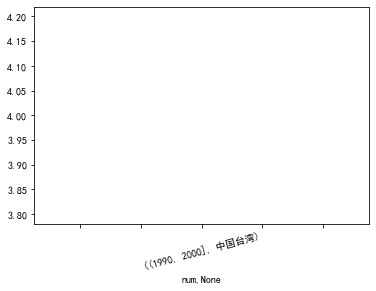

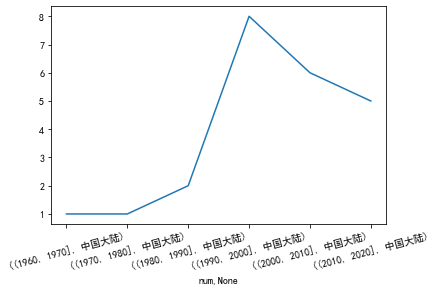

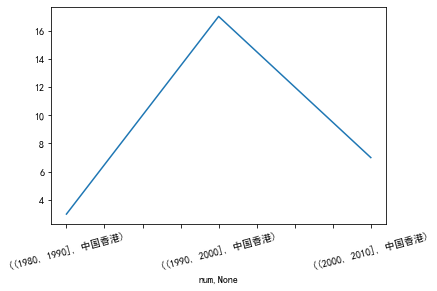

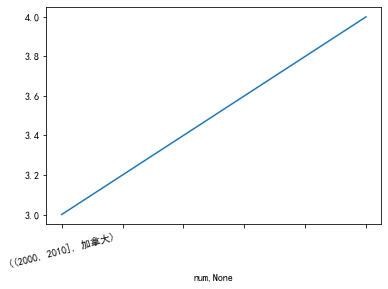

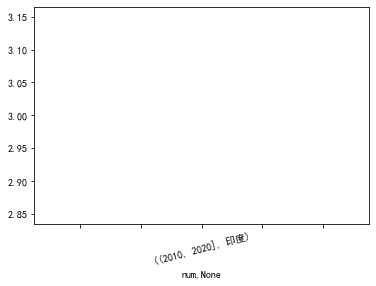

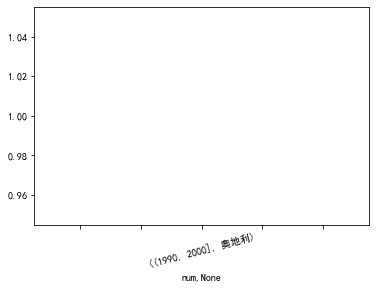

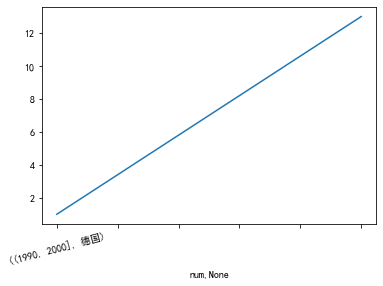

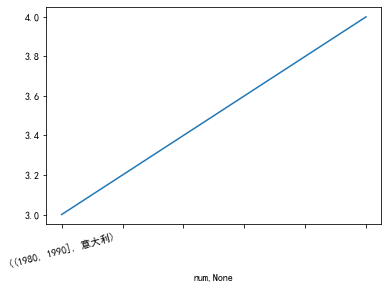

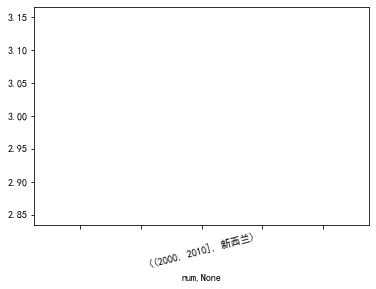

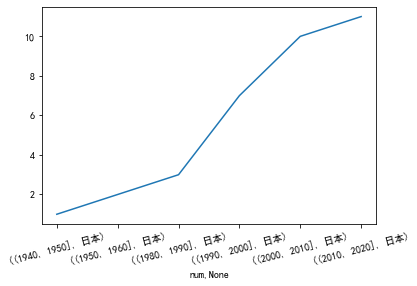

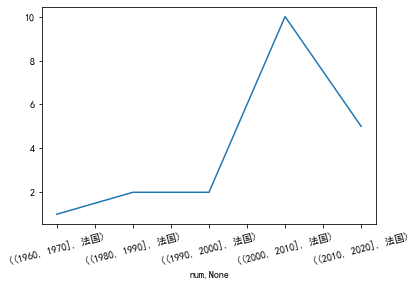

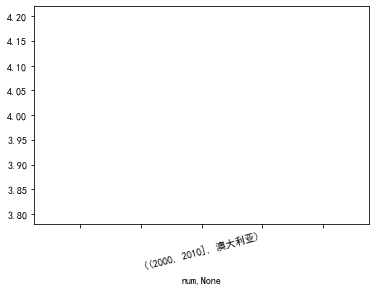

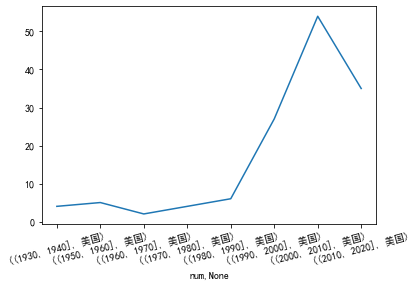

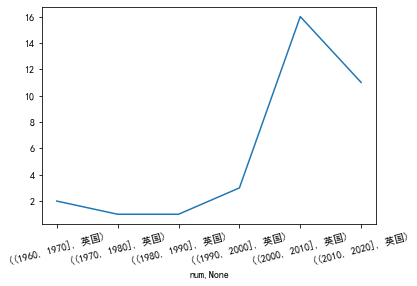

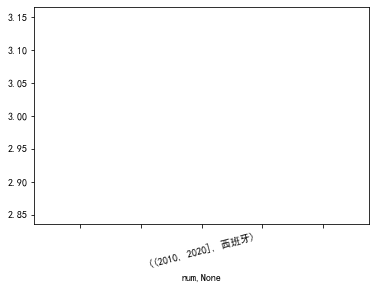

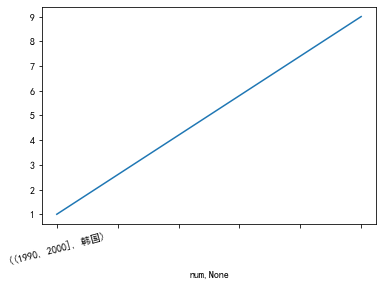

中国台湾    None
中国大陆    None
中国香港    None
加拿大     None
印度      None
奥地利     None
德国      None
意大利     None
新西兰     None
日本      None
法国      None
澳大利亚    None
美国      None
英国      None
西班牙     None
韩国      None
dtype: object

In [160]:
# 应用 画图函数
area_year_count.groupby(level=1).apply(draw_area_year_count)

In [161]:
# 把 索引，设置为列
area_year_count.reset_index()

,num,level_1,0
0,"(1930, 1940]",美国,4
1,"(1940, 1950]",日本,1
2,"(1950, 1960]",美国,5
3,"(1950, 1960]",日本,2
4,"(1960, 1970]",英国,2
5,"(1960, 1970]",美国,2
6,"(1960, 1970]",中国大陆,1
7,"(1960, 1970]",法国,1
8,"(1970, 1980]",美国,4
9,"(1970, 1980]",英国,1


In [162]:
# 把 level_1 列的值进行替换
area_year_count.reset_index().replace({'level_1':['中国大陆','中国香港','中国台湾']} ,'中国')

,num,level_1,0
0,"(1930, 1940]",美国,4
1,"(1940, 1950]",日本,1
2,"(1950, 1960]",美国,5
3,"(1950, 1960]",日本,2
4,"(1960, 1970]",英国,2
5,"(1960, 1970]",美国,2
6,"(1960, 1970]",中国,1
7,"(1960, 1970]",法国,1
8,"(1970, 1980]",美国,4
9,"(1970, 1980]",英国,1


In [163]:
# 重新变回到索引中 ，然后最后 取 【0】 这列，得到 series
area_year_count.reset_index().replace({'level_1':['中国大陆','中国香港','中国台湾']} ,'中国')\
    .set_index(['num','level_1'])[0]

num           level_1
(1930, 1940]  美国          4
(1940, 1950]  日本          1
(1950, 1960]  美国          5
              日本          2
(1960, 1970]  英国          2
              美国          2
              中国          1
              法国          1
(1970, 1980]  美国          4
              英国          1
              中国          1
(1980, 1990]  美国          6
              意大利         3
              日本          3
              中国          3
              中国          2
              法国          2
              英国          1
(1990, 2000]  美国         27
              中国         17
              中国          8
              日本          7
              中国          4
              英国          3
              法国          2
              奥地利         1
              德国          1
              韩国          1
(2000, 2010]  美国         54
              英国         16
              德国         13
              法国         10
              日本         10
              中国          7
              中国          

In [164]:
list(area_year_count.reset_index().replace({'level_1':['中国大陆','中国香港','中国台湾']} ,'中国')\
    .set_index(['num','level_1'])[0].groupby(level=1) )

[('中国',
  num           level_1
  (1960, 1970]  中国          1
  (1970, 1980]  中国          1
  (1980, 1990]  中国          3
                中国          2
  (1990, 2000]  中国         17
                中国          8
                中国          4
  (2000, 2010]  中国          7
                中国          6
  (2010, 2020]  中国          5
  Name: 0, dtype: int64),
 ('加拿大',
  num           level_1
  (2000, 2010]  加拿大        3
  (2010, 2020]  加拿大        4
  Name: 0, dtype: int64),
 ('印度',
  num           level_1
  (2010, 2020]  印度         3
  Name: 0, dtype: int64),
 ('奥地利',
  num           level_1
  (1990, 2000]  奥地利        1
  Name: 0, dtype: int64),
 ('德国',
  num           level_1
  (1990, 2000]  德国          1
  (2000, 2010]  德国         13
  Name: 0, dtype: int64),
 ('意大利',
  num           level_1
  (1980, 1990]  意大利        3
  (2010, 2020]  意大利        4
  Name: 0, dtype: int64),
 ('新西兰',
  num           level_1
  (2000, 2010]  新西兰        3
  Name: 0, dtype: int64),
 ('日本',
  num           lev

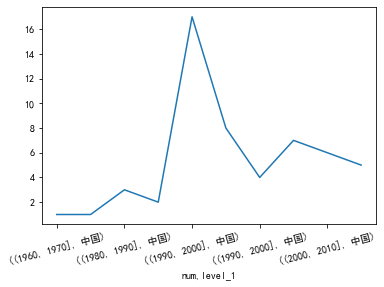

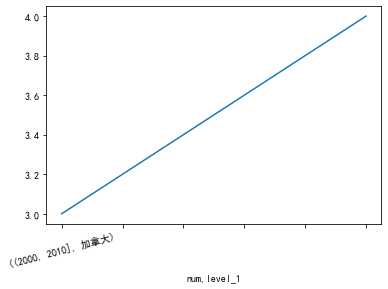

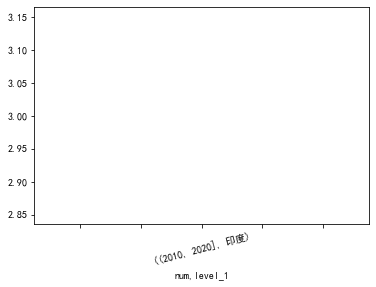

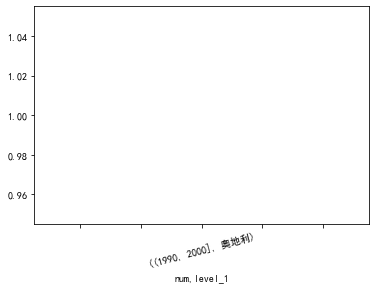

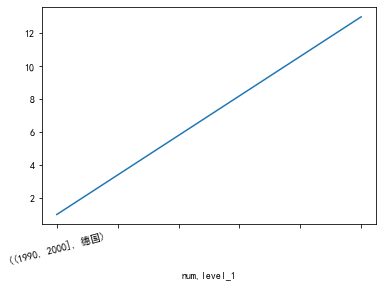

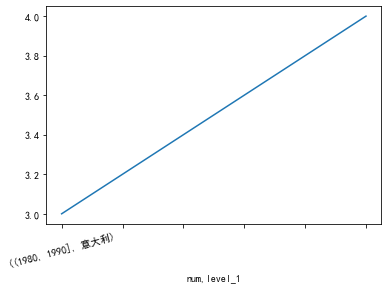

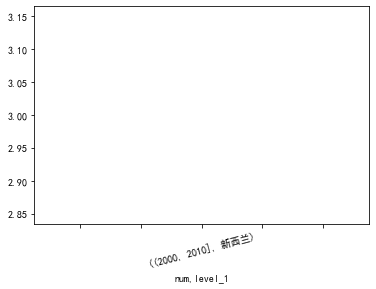

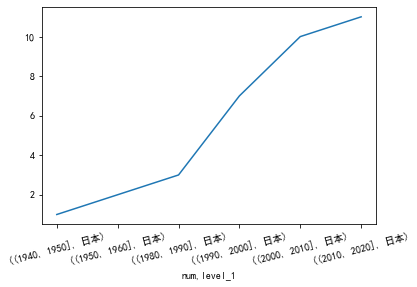

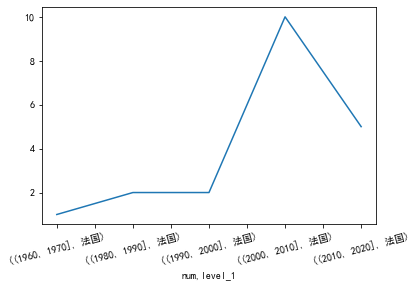

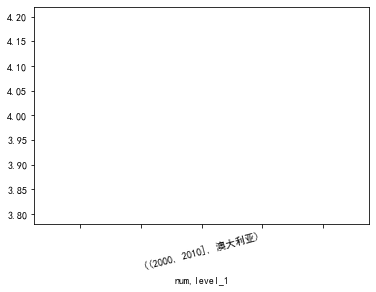

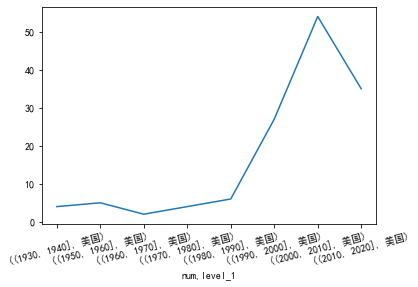

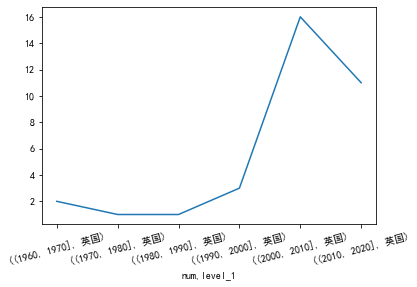

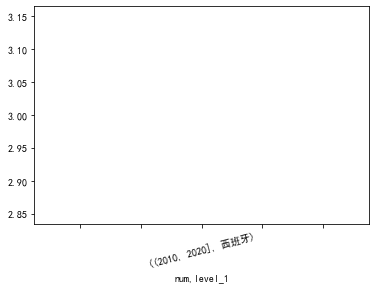

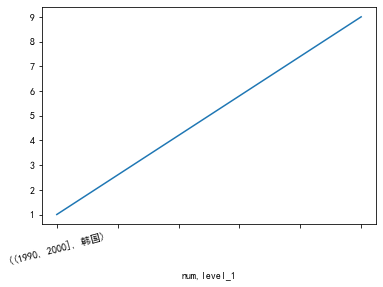

level_1
中国      None
加拿大     None
印度      None
奥地利     None
德国      None
意大利     None
新西兰     None
日本      None
法国      None
澳大利亚    None
美国      None
英国      None
西班牙     None
韩国      None
Name: 0, dtype: object

In [165]:
area_year_count.reset_index().replace({'level_1':['中国大陆','中国香港','中国台湾']} ,'中国')\
    .set_index(['num','level_1'])[0].groupby(level=1).apply(draw_area_year_count)

In [166]:

#  也可以先 替换为 中国 ，然后再处理 

# 注意 num 列的是数字，applymap处理的是str， 需要转为str去替换
area_year.applymap( lambda x: re.sub( re.compile('中国\w\w') ,'中国' ,str(x))  )

,area,year,num
0,美国,1994-09-10(多伦多电影节),1994
1,中国 / 中国,1993-01-01(中国),1993
2,美国,1994-06-23(洛杉矶首映),1994
3,法国 / 美国,1994-09-14(法国),1994
4,美国,1998-04-03(中国),1998
...,...,...,...
245,美国 / 澳大利亚,2003-07-18(中国),2003
246,美国 / 俄罗斯,2018-12-14(中国),2018
247,中国,2019-01-04(中国),2019
248,英国 / 美国,1971-12-19(纽约首映),1971


In [167]:
area_year
re.sub( re.compile('中国\w\w') ,'中国' ,'中国大陆 / 中国香港')

'中国 / 中国'

In [168]:
def dddd(x):
    print(x)
    return re.sub( re.compile('中国\w\w') ,'中国' ,str(x))

###  2.6、片长

In [169]:
data.movie_duration

0           142分钟
1           171分钟
2           142分钟
3      110分钟(剧场版)
4           194分钟
          ...    
245         138分钟
246         102分钟
247         105分钟
248        136 分钟
249         115分钟
Name: movie_duration, Length: 250, dtype: object

In [170]:
data.movie_duration.apply(lambda x:  x.split('分')[0] ).astype(int)

0      142
1      171
2      142
3      110
4      194
      ... 
245    138
246    102
247    105
248    136
249    115
Name: movie_duration, Length: 250, dtype: int32

In [171]:
# 统计每 30分钟的 数量
data.movie_duration.apply(lambda x:  x.split('分')[0] ).astype(int).value_counts( bins= range(0,360,30) )

(90.0, 120.0]     112
(120.0, 150.0]     77
(150.0, 180.0]     29
(60.0, 90.0]       22
(180.0, 210.0]      6
(210.0, 240.0]      3
(30.0, 60.0]        1
(-0.001, 30.0]      0
(240.0, 270.0]      0
(270.0, 300.0]      0
(300.0, 330.0]      0
Name: movie_duration, dtype: int64

In [172]:
data[data.movie_duration.apply(lambda x:  x.split('分')[0] ).astype(int)>=180]

,rank,filmname,director,writer,actors,movie_type,area,language,year,movie_duration,score,numRaters,tags
4,5,泰坦尼克号,詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费舍...,"['剧情', '爱情', '灾难']",美国,英语 / 意大利语 / 德语 / 俄语,1998-04-03(中国大陆),194分钟,9.4,1556469,"['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']"
7,8,辛德勒的名单,史蒂文·斯皮尔伯格,托马斯·肯尼利 / 斯蒂文·泽里安,连姆·尼森 / 本·金斯利 / 拉尔夫·费因斯 / 卡罗琳·古多尔 / 乔纳森·萨加尔 / ...,"['剧情', '历史', '战争']",美国,英语 / 希伯来语 / 德语 / 波兰语,1993-11-30(华盛顿首映),195分钟,9.5,815782,"['人性', '二战', '经典', '战争', '斯皮尔伯格', '辛德勒的名单', '美..."
30,31,乱世佳人,维克多·弗莱明 / 乔治·库克 / 山姆·伍德,玛格丽特·米歇尔 / 西德尼·霍华德 / 奥利弗·H·P·加勒特 / 本·赫克特 / 乔·斯...,费雯·丽 / 克拉克·盖博 / 奥利维娅·德哈维兰 / 托马斯·米切尔 / 芭芭拉·欧内尔 ...,"['剧情', '爱情', '历史', '战争']",美国,英语,1939-12-15(亚特兰大首映),238分钟,9.3,509570,"['经典', '爱情', '乱世佳人', '战争', '飘', '美国', '名著改编', ..."
33,34,指环王3：王者无敌,彼得·杰克逊,弗兰·威尔士 / 菲利帕·鲍恩斯 / 彼得·杰克逊 / J·R·R·托尔金,伊利亚·伍德 / 西恩·奥斯汀 / 维果·莫腾森 / 奥兰多·布鲁姆 / 伊恩·麦克莱恩 /...,"['剧情', '动作', '奇幻', '冒险']",美国 / 新西兰,英语 / 昆雅语 / 古英语 / 辛达林语,2004-03-12(中国大陆),201分钟,9.2,562567,"['魔幻', '史诗', '经典', '美国', '战争', '奥斯卡', '新西兰', '..."
49,50,教父2,弗朗西斯·福特·科波拉,弗朗西斯·福特·科波拉 / 马里奥·普佐,阿尔·帕西诺 / 罗伯特·杜瓦尔 / 黛安·基顿 / 罗伯特·德尼罗 / 约翰·凯泽尔 / ...,"['剧情', '犯罪']",美国,英语 / 意大利语 / 西班牙语 / 拉丁语 / 西西里语,1974-12-12(纽约首映),202分钟,9.2,385004,"['黑帮', '教父', '经典', '美国', '犯罪', '剧情', '人性', '人生']"
75,76,美国往事,赛尔乔·莱昂内,皮耶罗·德·贝纳迪 / 莱奥纳多·本韦努蒂 / 弗兰科·奥卡利 / 恩里科·梅迪欧力 / 弗...,罗伯特·德尼罗 / 詹姆斯·伍兹 / 伊丽莎白·麦戈文 / 乔·佩西 / 波特·杨 / 塔斯...,"['剧情', '犯罪']",美国 / 意大利,英语 / 法语 / 意大利语,1984-02-17(波士顿首映),229分钟(导演剪辑版),9.2,310569,"['黑帮', '经典', '美国', '人生', '美国往事', '罗伯特·德尼罗', '剧..."
150,151,七武士,黑泽明,黑泽明 / 桥本忍 / 小国英雄,三船敏郎 / 志村乔 / 津岛惠子 / 岛崎雪子 / 藤原釜足 / 加东大介 / 木村功 /...,"['剧情', '动作', '冒险']",日本,日语,1954-04-26(日本),207分钟,9.2,139254,"['黑泽明', '日本', '经典', '日本电影', '七武士', '武士', '剧情',..."
193,194,绿里奇迹,弗兰克·德拉邦特,弗兰克·德拉邦特 / 斯蒂芬·金,汤姆·汉克斯 / 大卫·摩斯 / 迈克·克拉克·邓肯 / 邦尼·亨特 / 詹姆斯·克伦威尔 ...,"['剧情', '悬疑', '犯罪', '奇幻']",美国,英语 / 法语,1999-12-10(美国),189 分钟,8.8,209749,"['人性', '汤姆·汉克斯', '美国', '监狱', '经典', '剧情', '奇幻',..."
209,210,牯岭街少年杀人事件,杨德昌,杨德昌 / 赖铭堂 / 杨顺清 / 鸿鸿,张震 / 杨静怡 / 张国柱 / 王启赞 / 林鸿铭 / 金燕玲 / 王琄 / 张翰 / 姜...,"['剧情', '犯罪']",中国台湾,汉语普通话 / 闽南语 / 上海话 / 粤语,1991-07-27(中国台湾),237分钟(导演剪辑版),8.8,191442,"['杨德昌', '台湾', '青春', '牯岭街少年杀人事件', '张震', '台湾电影',..."


### 2.7 、 排名、评分与评论人数的关系
    一般在处理数据时，还有一堆 数值型数据的列
    取出三列， 挖掘数据之间的关系
    

In [173]:
data[ ['rank','score','numRaters'] ]

,rank,score,numRaters
0,1,9.7,2123239
1,2,9.6,1573440
2,3,9.5,1603749
3,4,9.4,1790692
4,5,9.4,1556469
...,...,...,...
245,246,8.6,269358
246,247,8.6,394569
247,248,8.9,123204
248,249,8.6,288083


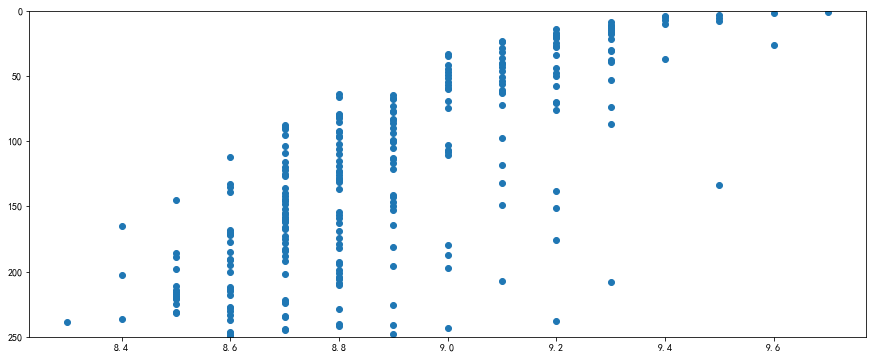

In [174]:
# 画 散点图 ， 评分 与 rank
plt.figure( figsize=(15,6) )
plt.scatter( data['score'] , data['rank']  )

# plt.gca().invert_yaxis()  反转 y 轴的语法
# 数值型的 y 轴
plt.ylim(250,0)
plt.show()

    排名与 评分有一定的关系

In [175]:
# 评论人数  与 排名的关系
scatter = Scatter()
scatter.add('',data['score'] , data['rank'] ,is_yaxis_inverse =True ,xaxis_min=8)

In [176]:
# 评论人数  与 排名的关系
scatter = Scatter()
scatter.add('',data['numRaters'] , data['rank'] ,is_yaxis_inverse =True)

In [177]:
scatter = Scatter()
scatter.add('',data['numRaters'] , year, yaxis_min=1930 )

### 2.8  电影标签

In [178]:
data.tags

0       ['经典', '励志', '信念', '自由', '人性', '人生', '美国', '希望']
1       ['经典', '人性', '文艺', '爱情', '人生', '文革', '剧情', '同志']
2       ['励志', '经典', '人生', '成长', '美国', '信念', '剧情', '人性']
3       ['经典', '温情', '爱情', '人性', '成长', '剧情', '犯罪', '动作']
4      ['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']
                             ...                        
245    ['科幻', '美国', '动作', '黑客帝国', '经典', '哲学', '美国电影',...
246    ['悬疑', '犯罪', '美国', '推理', '剧情', '网络', '家庭', '20...
247    ['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ...
248    ['暴力', '库布里克', '发条橙', '英国', '经典', '青春', '犯罪', ...
249    ['科幻', '斯皮尔伯格', '经典', '美国', 'ET', '外星人', '美国电影...
Name: tags, Length: 250, dtype: object

In [179]:
tags_count = vcounts(data.tags)
tags_count

美国             123
经典             114
剧情             106
人性              83
温情              58
              ... 
超级英雄             1
赫本               1
NicolasCage      1
黎巴嫩              1
梅尔·吉布森           1
Length: 433, dtype: int64

In [180]:
wc = WordCloud()
wc.add('' ,tags_count.index  ,tags_count.values )

    结论 : 观众更喜欢 打 哪些 电影标签

In [181]:
data[['filmname','movie_type','year','tags']]

,filmname,movie_type,year,tags
0,肖申克的救赎,"['剧情', '犯罪']",1994-09-10(多伦多电影节),"['经典', '励志', '信念', '自由', '人性', '人生', '美国', '希望']"
1,霸王别姬,"['剧情', '爱情', '同性']",1993-01-01(中国香港),"['经典', '人性', '文艺', '爱情', '人生', '文革', '剧情', '同志']"
2,阿甘正传,"['剧情', '爱情']",1994-06-23(洛杉矶首映),"['励志', '经典', '人生', '成长', '美国', '信念', '剧情', '人性']"
3,这个杀手不太冷,"['剧情', '动作', '犯罪']",1994-09-14(法国),"['经典', '温情', '爱情', '人性', '成长', '剧情', '犯罪', '动作']"
4,泰坦尼克号,"['剧情', '爱情', '灾难']",1998-04-03(中国大陆),"['爱情', '经典', '灾难', '浪漫', '美国', '感动', '奥斯卡', '大片']"
...,...,...,...,...
245,黑客帝国2：重装上阵,"['动作', '科幻']",2003-07-18(中国大陆),"['科幻', '美国', '动作', '黑客帝国', '经典', '哲学', '美国电影',..."
246,网络谜踪,"['剧情', '悬疑', '惊悚', '犯罪']",2018-12-14(中国大陆),"['悬疑', '犯罪', '美国', '推理', '剧情', '网络', '家庭', '20..."
247,四个春天,"['纪录片', '家庭']",2019-01-04(中国大陆),"['纪录片', '家庭', '亲情', '温情', '人文', '生活', '中国大陆', ..."
248,发条橙,"['剧情', '科幻', '犯罪']",1971-12-19(纽约首映),"['暴力', '库布里克', '发条橙', '英国', '经典', '青春', '犯罪', ..."


In [182]:
def group_movie_type(df,n=5):
    return  vcounts(df['movie_type']).head(n)

In [183]:
mt_year = DataFrame()
mt_year['movie_type'] = data.movie_type
mt_year['year'] = year
mt_year

,movie_type,year
0,"['剧情', '犯罪']",1994
1,"['剧情', '爱情', '同性']",1993
2,"['剧情', '爱情']",1994
3,"['剧情', '动作', '犯罪']",1994
4,"['剧情', '爱情', '灾难']",1998
...,...,...
245,"['动作', '科幻']",2003
246,"['剧情', '悬疑', '惊悚', '犯罪']",2018
247,"['纪录片', '家庭']",2019
248,"['剧情', '科幻', '犯罪']",1971


In [184]:
mt_year.groupby( by=num_cut ).apply(group_movie_type,10)

num             
(1930, 1940]  爱情     4
              剧情     4
              喜剧     2
              战争     2
              历史     1
                    ..
(2010, 2020]  动画    10
              犯罪    10
              奇幻     8
              传记     7
              科幻     7
Length: 74, dtype: int64

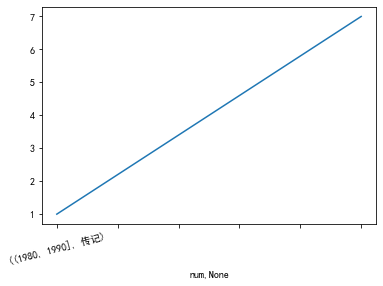

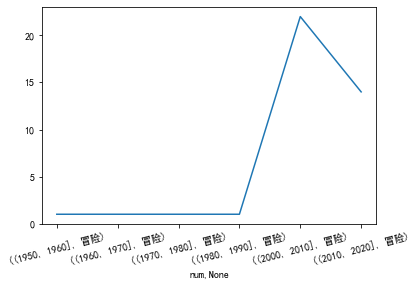

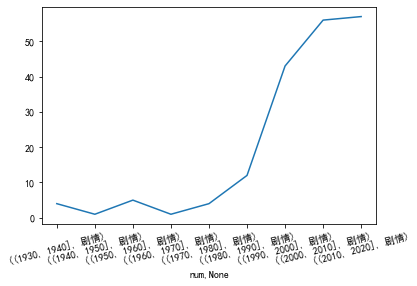

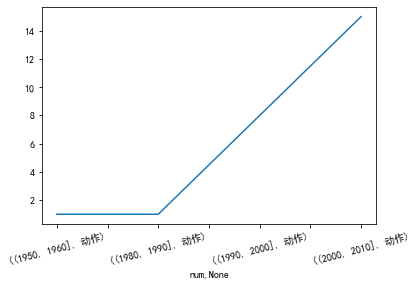

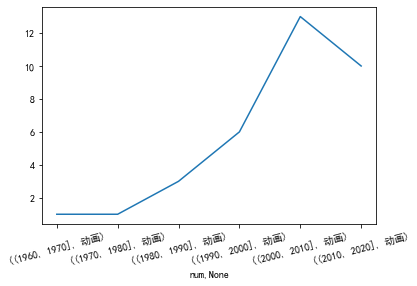

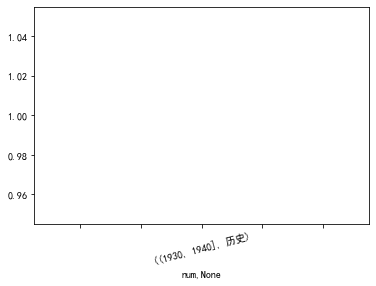

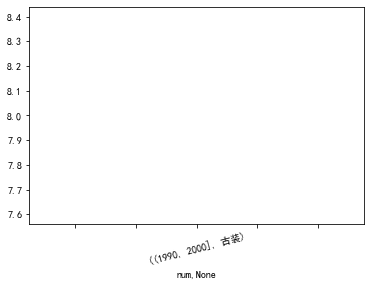

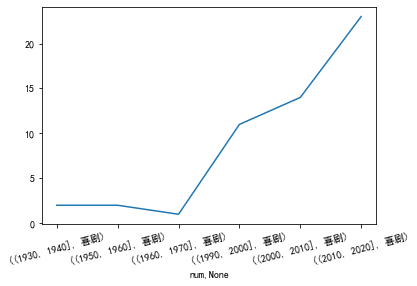

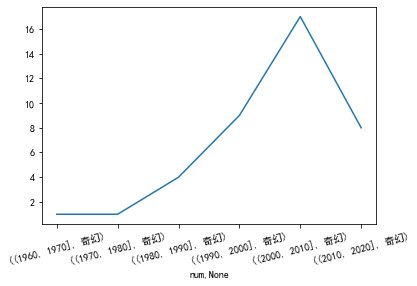

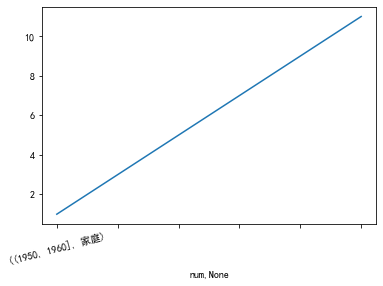

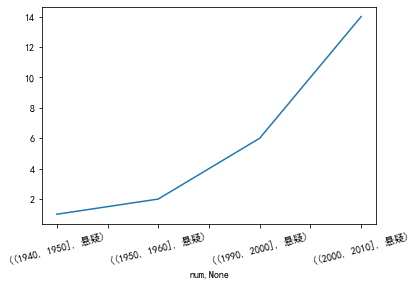

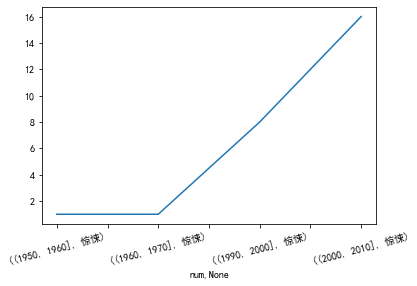

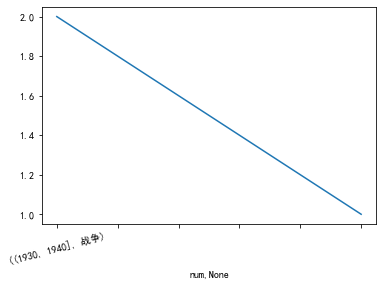

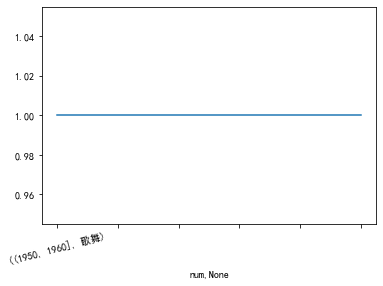

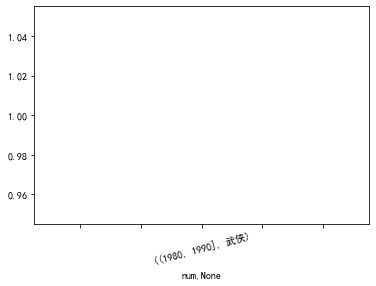

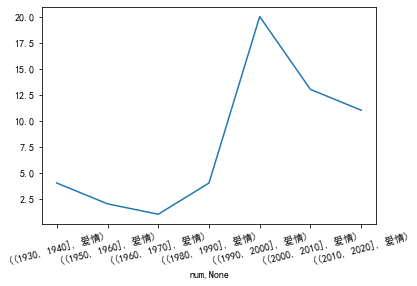

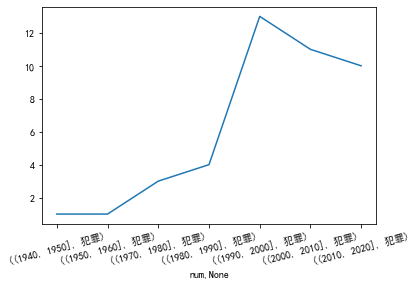

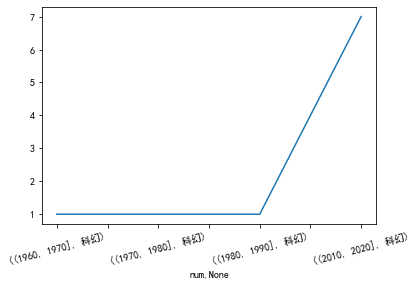

传记    None
冒险    None
剧情    None
动作    None
动画    None
历史    None
古装    None
喜剧    None
奇幻    None
家庭    None
悬疑    None
惊悚    None
战争    None
歌舞    None
武侠    None
爱情    None
犯罪    None
科幻    None
dtype: object

In [185]:
mt_year.groupby( by=num_cut ).apply(group_movie_type,10).groupby(level=1).apply(draw_area_year_count)

    结论： 剧情类 一直 变多。 
        。。。。。。

## 3、项目总结：
    哪些结论：
    哪些建议：
    哪些改进方案:
    
    数据 + 图像
    PPT
    。。。。